<a href="https://colab.research.google.com/github/JumpNShootMan/CV/blob/master/IA_RN_PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Graficar Frontera de Decisión

In [ ]:
# the functions below grabbed from http://www.astroml.org/book_figures/appendix/fig_neural_network.html
# our standard imports: matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# just to overwrite default colab style
plt.style.use('default')
plt.style.use('seaborn-talk')

radius = 0.3

arrow_kwargs = dict(head_width=0.05, fc='black')

def draw_connecting_arrow(ax, circ1, rad1, circ2, rad2):
    theta = np.arctan2(circ2[1] - circ1[1],
                       circ2[0] - circ1[0])

    starting_point = (circ1[0] + rad1 * np.cos(theta),
                      circ1[1] + rad1 * np.sin(theta))

    length = (circ2[0] - circ1[0] - (rad1 + 1.4 * rad2) * np.cos(theta),
              circ2[1] - circ1[1] - (rad1 + 1.4 * rad2) * np.sin(theta))

    ax.arrow(starting_point[0], starting_point[1],
             length[0], length[1], **arrow_kwargs)


def draw_circle(ax, center, radius):
    circ = plt.Circle(center, radius, fill=False, lw=2)
    ax.add_patch(circ)

In [ ]:
# based on borrowed function we can create a new one to draw NN

def draw_net(input_size, output_size, hidden_layers=[], w=6, h=4):
  """Draw a network"""
  x = 0  # initial layer position
  
  ax = plt.subplot()
  ax.set_aspect('equal')
  ax.axis('off')

  ax.set_xlim([-2, -2 + w])
  ax.set_ylim([-h / 2 , h / 2 + 1])
  
  # set y position  
  y_input = np.arange(-(input_size - 1) / 2, (input_size + 1) / 2, 1)
  y_output = np.arange(-(output_size - 1) / 2, (output_size + 1) / 2, 1)
  y_hidden = [np.arange(-(n - 1) / 2, (n + 1) / 2, 1) for n in hidden_layers]
  
  # draw input layer
  plt.text(x, h / 2 + 0.5, "Capa\nEntrada", ha='center', va='top', fontsize=16)
  
  for i, y in enumerate(y_input):
    draw_circle(ax, (x, y), radius)
    ax.text(x - 0.9, y, '$x_%i$' % (input_size - 1 - i),
            ha='right', va='center', fontsize=16)
    draw_connecting_arrow(ax, (x - 0.9, y), 0.1, (x, y), radius)
  
  last_layer = y_input  # last layer y positions
  
  # draw hidden layers
  for ys in y_hidden:
    # shift x
    x += 2
    plt.text(x, h / 2 + 0.5, "Capa\nOculta", ha='center', va='top', fontsize=16)
    
    # draw neurons for each hidden layer
    for i, y1 in enumerate(ys):
      draw_circle(ax, (x, y1), radius)
      
      # connect a neuron with all neurons from previous layer
      if i != len(ys) - 1: # skip bias
        for y2 in last_layer:
          draw_connecting_arrow(ax, (x - 2, y2), radius, (x, y1), radius)
        
    # update last layer
    last_layer = ys
  
  x += 2  # update position for output layer
    
  # draw output layer
  plt.text(x, h / 2 + 0.5, "Capa\nSalida", ha='center', va='top', fontsize=16)

  for i, y1 in enumerate(y_output):
    draw_circle(ax, (x, y1), radius)
    ax.text(x + 0.8, y1, 'Salida', ha='left', va='center', fontsize=16)
    draw_connecting_arrow(ax, (x, y1), radius, (x + 0.8, y1), 0.1)

    # connect each output neuron with all neurons from previous layer
    for y2 in last_layer:
      draw_connecting_arrow(ax, (x - 2, y2), radius, (x, y1), radius)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def printing_db(X, y, model):
    markers = ['x','o','*']
    colors = ['red','blue','green']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    res = 0.02
    #Plot regions
    x1min, x1max = X[:,0].min() -1, X[:,0].max() + 1
    x2min, x2max = X[:,1].min() -1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x1min,x1max,res),np.arange(x2min,x2max,res))

    output = model.predict(np.array([xx.ravel(), yy.ravel()]).T)
    output = output.reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx,yy, output, cmap=plt.cm.GnBu_r)

    #PLOT ALL SAMPLES
    for index, item in enumerate(np.unique(y)):
        plt.scatter(x=X[y == item, 0], y=X[y == item, 1],alpha=0.8, c=cmap(index),
        marker=markers[index], label=item)

    plt.xlabel('Petal length std')
    plt.ylabel('Petal width std')

    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.legend(loc='best')
    plt.show()




# 2. Introducción a los datasets

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


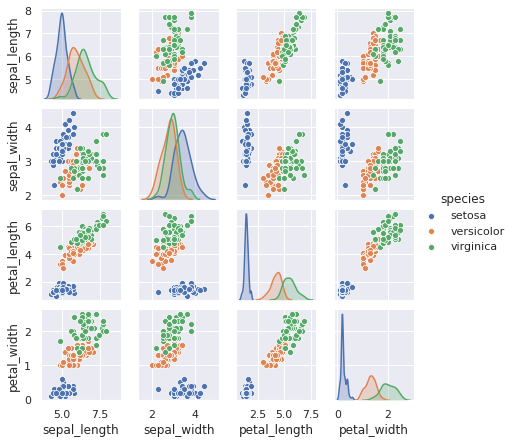

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

# Métricas de Desempeño para Supervised Machine Learning


## Ejemplo:
Asumimos que el problema tiene 3 clases:
- 0: persona enferma
- 1: persona en evaluación
- 2: persona sana

In [ ]:
y_pred = [0,1,1,0,0,2,1,2,1,0]
y_verdadera = [0,1,0,1,2,0,2,1,2,1]
tam = len(y_pred)
print("True\tPred")
for i in range(tam):
  print("{}\t{}".format(y_verdadera[i], y_pred[i]))
    

True	Pred
0	0
1	1
0	1
1	0
2	0
0	2
2	1
1	2
2	1
1	0


## Métrica Exactitud

In [ ]:
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_verdadera, y_pred)
print("La exactitud es: {}".format(exactitud))

La exactitud es: 0.5


## Un ejemplo sobre medidas de desempeño en la tarea de clasificación:

Supongamos que estamos en un escenario donde hay que clasificar a las personas como sanas o enfermas, donde una persona sana se clasifica como "1" y una persona enferma se clasifica como "0".


Supongamos que se evaluaron a 10 personas y se determinó con tests médicos lo siguiente:
- 6 personas estaban sanas
- 4 personas estaban enfermas


In [ ]:
y_real = [0, 1, 0, 1, 1, 1, 0, 1, 1, 0]

print("Persona\tEstado")
k = 1
for i in y_real:
  if i==0:
    estado = 'Enferma'
  else:  
    estado = 'Sana'
  print("Persona {}\t{}".format(k, estado))
  k += 1


Persona	Estado
Persona 1	Enferma
Persona 2	Sana
Persona 3	Enferma
Persona 4	Sana
Persona 5	Sana
Persona 6	Sana
Persona 7	Enferma
Persona 8	Sana
Persona 9	Sana
Persona 10	Enferma


### Usamos un modelo de aprendizaje supervisado para clasificar a una persona

Dado un conjunto de características $X$, debemos predecir una clase (y_predecidos) para cada ejemplar.

In [ ]:
import random
h = random.randint(0,1)
print(h)
h = random.randint(0,1)
print(h)
h = random.randint(0,1)
print(h)

1
1
0


In [ ]:
def prediccion_falsa(n_ejemplares):
  y_predecidos = []
  for i in range(n_ejemplares):
    y_predecidos.append( random.randint(0,1)  )
  return y_predecidos 

In [ ]:
#Programa principal
n_ejemplares = len(y_real)
y_predecidos = prediccion_falsa(n_ejemplares)
print(y_predecidos)

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]


In [ ]:
print("Real\tPredecido")
for i in range(n_ejemplares):
  print("{}\t{}".format(y_real[i], y_predecidos[i]))

Real	Predecido
0	0
1	1
0	0
1	1
1	1
1	1
0	0
1	0
1	0
0	0


In [ ]:
#Dándole un poco de semántica
print("ID\tReal\tPredecido")
print("=======================")
u = 1
for i in range(n_ejemplares):
  if y_real[i] == 0:
    estado_real = "Enfermo"
  else:  
    estado_real = "Sano"
  
  if y_predecidos[i] == 0:
    estado_predecido = "Enfermo"
  else:
    estado_predecido = "Sano"

  print("{}\t{}\t{}".format(u,estado_real, estado_predecido))
  u += 1

ID	Real	Predecido
1	Enfermo	Enfermo
2	Sano	Sano
3	Enfermo	Enfermo
4	Sano	Sano
5	Sano	Sano
6	Sano	Sano
7	Enfermo	Enfermo
8	Sano	Enfermo
9	Sano	Enfermo
10	Enfermo	Enfermo


- Clase positiva: Enfermo
- Clase negativa: Sano 

## Matriz de Confusión
La matriz confusión incluye 4 tipos de valores:
- Verdaderos positivos (VP): según el contexto con aquellas personas catalogadas como 'Enfermo' y verdaderamente están enfermos.
- Falsos positivos (FP): según el contexto con aquellas personas catalogadas falsamente como 'Enfermo'.
- Falsos negativos (FN): según el contexto con aquellas personas catalogadas falsamente como 'Sano'.
- Verdaderos negativos (VN): según el contexto con aquellas personas catalogadas como 'Sano' y verdaderamente están sanos.

Por convención:
- Las filas contienen los valores predecidos (y_predecidos).
- Las columnas contienen los valores reales (y_real).

In [ ]:
clase_positiva = 0 #las personas enfermas
clase_negativa = 1 #las personas sanas

def obtener_vp_fp_vn_fn_de_matriz(matriz_confusion):
  vp = matriz_confusion[0][0]
  fp = matriz_confusion[0][1]
  vn = matriz_confusion[1][1]
  fn = matriz_confusion[1][0]
  return vp, fp, vn, fn

def obtener_vp_fp_vn_fn(y_real, y_predecidos):
  tam = len(y_real)
  fp = 0
  vp = 0
  fn = 0
  vn = 0
  for i in range(tam):
    #detectando falsos positivos : FP
    if y_predecidos[i]!=y_real[i] and y_predecidos[i] == clase_positiva:
      fp += 1
    elif y_predecidos[i]==y_real[i] and y_predecidos[i] == clase_positiva: #detectando verdaderos positivos : VP  
      vp += 1
    elif y_predecidos[i]==y_real[i] and y_predecidos[i] == clase_negativa: #detectando verdaderos negativos : VN  
      vn += 1
    elif y_predecidos[i]!=y_real[i] and y_predecidos[i] == clase_negativa : #detectando falsos negativos: FN  
      fn += 1
  return vp, fp, vn, fn    

In [ ]:
vp, fp, vn, fn = obtener_vp_fp_vn_fn(y_real, y_predecidos)
matriz_confusion = [
       # real 0, real 1             
          [vp,fp], #cuando el clasificador predice clase 0
          [fn,vn]  #cuando el clasificador predice clase 1
]

for fila in matriz_confusion:
  print(fila)

[4, 2]
[0, 4]


## Métrica de Exactitud (Accuracy)
$$E = \frac{VP + VN}{VP + VN + FP + FN}$$

In [ ]:
def accuracy(vp, vn, fp, fn):
  correctos = vp + vn
  total = vp + vn + fp + fn
  return correctos / total

#Programa principal
acc = accuracy(vp, vn, fp, fn)  
print("La exactitud es: {}".format(acc))

La exactitud es: 0.8


## Métrica de Precisión
$$P = \frac{VP}{VP + FP}$$

In [ ]:
def precision(vp, vn, fp, fn):
  if (vp+fp) == 0:
    return 0
  return vp/(vp+fp)

  

In [ ]:
#Programa principal
pr = precision(vp, vn, fp, fn)  
print("La precisión es: {}".format(pr))

La precisión es: 0.6666666666666666


## Métrica de Recall
$$R = \frac{VP}{VP + FN}$$

In [ ]:
def recall(vp, vn, fp, fn):
  if (vp+fn) == 0:
    return 0
  return vp / (vp+fn)

In [ ]:
rec = recall(vp, vn, fp, fn)
print("El recall es: {}".format(rec))

El recall es: 1.0


In [ ]:
for fila in matriz_confusion:
  print(fila)

[4, 2]
[0, 4]


- Se presentaron 4 personas enfermas, y esas 4 personas fueron clasificadas como enfermas. Por lo tanto, su recall es de 100%
- Nuestra función aleatoria clasificó a 6 personas como enfermas, de las cuales 4 resultaron verdaderamente estar enfermas (VP) y 2 resultaron que estaban sanas (FP). Por lo tanto, su precisión es de $\approx 67$%

## Métrica F1
Es la media armónica entre precisión y recall:
$$F1 = \frac{2\times P \times R}{P+R}$$, donde $P$ es precisión y $R$ es recall.

In [ ]:
def f1_score(vp, vn, fp, fn):
  p = precision(vp, vn, fp, fn)
  r = recall(vp, vn, fp, fn)
  if (p+r) == 0:
    return 0
  return 2 * p * r / (p+r)
  

In [ ]:
f1 = f1_score(vp, vn, fp, fn)
print("F1 es: {}".format(f1))

F1 es: 0.8


### Un caso particular para analizar con las métricas
La clase 'fraude' es 0. La clase 'no fraude' es 1.

In [ ]:
matriz_confusion2 = [
                     [70, 4930],
                     [13930, 981700]
]

for fila in matriz_confusion2:
  print(fila)

[70, 4930]
[13930, 981700]


Calculamos la exactitud:

In [ ]:
vp, fp, vn, fn = obtener_vp_fp_vn_fn_de_matriz(matriz_confusion2)
acc2 = accuracy(vp, vn, fp, fn)
print("La exactitud es: {}".format(acc2))

La exactitud es: 0.9811518743191789


Calculamos la precisión:


In [ ]:
pr2 = precision(vp, vn, fp, fn)
print("La precisión es: {}".format(pr2))

La precisión es: 0.014


Calculamos el recall:

In [ ]:
rec2 = recall(vp, vn, fp, fn)
print("El recall es: {}".format(rec2))

El recall es: 0.005


Analicemos la matriz de confusión:

In [ ]:
for fila in matriz_confusion2:
  print(fila)

[70, 4930]
[13930, 981700]


Calculamos el F1:


In [ ]:
f1_2 = f1_score(vp, vn, fp, fn)
print("F1 es: {}".format(f1_2))

F1 es: 0.00736842105263158


# Muestreo de datos

## Muestreo Erróneo
Muestreo ingenuo para utilizar nuestros clasificadores

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data #conjunto de features
y = iris.target # variable target o variable clase

Usamos KNN para clasificar los datos:

In [ ]:
#Usamos un modelo: KNN
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier(n_neighbors = 1)

Entrenamos nuestro modelo:

In [ ]:
modelo.fit(X,y) #Fase de Entrenamiento    
y_predecidos = modelo.predict(X) #Fase de Test   

Hallamos la exactitud:

In [ ]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y, y_predecidos)
print("La exactitud es: {}".format(acc1))

La exactitud es: 1.0


Tenemos un problema: usamos el mismo dataset para la fase de entrenamiento y para la fase de test.

## Muestreo Holdout
Divide el dataset en dataset para entrenamiento y para testing.

In [ ]:
from sklearn.model_selection import train_test_split
# Divide la data en entrenmiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.7)

#Entrenamos nuestro algoritmo con la data
modelo.fit(X_train, Y_train)
#Validamos el modelo
y_predecidos = modelo.predict(X_test)
acc1 = accuracy_score(Y_test, y_predecidos)
print("La exactitud del modelo es: {}".format(acc1))


La exactitud del modelo es: 0.9555555555555556


## Muestreo con Cross-validation
Ejemplo:
hacemos un 2-fold cross validation:

In [ ]:
y_predecidos1 = modelo.fit(X_train, Y_train).predict(X_test)
y_predecidos2 = modelo.fit(X_test, Y_test).predict(X_train)
accuracy_score(Y_test, y_predecidos1), accuracy_score(Y_train, y_predecidos2)

(0.9555555555555556, 0.9619047619047619)

Podemos usar 10-fold cross validation:

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(modelo, X, y, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.86666667, 1.        , 1.        , 1.        ])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(modelo, X, y, cv=10, scoring='recall_macro')

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.86666667, 1.        , 1.        , 1.        ])

In [ ]:
cross_val_score(modelo, X, y, cv=10, scoring='precision_macro')

array([1.        , 0.94444444, 1.        , 0.94444444, 0.9047619 ,
       1.        , 0.86666667, 1.        , 1.        , 1.        ])

In [ ]:
cross_val_score(modelo, X, y, cv=10, scoring='f1_macro')

array([1.        , 0.93265993, 1.        , 0.93265993, 0.86111111,
       1.        , 0.86666667, 1.        , 1.        , 1.        ])

# Introducción a Redes Neuronales Artificial (RNAs)

## Caso de Personas Sanas/Enfermas
Considerando los siguientes síntomas:
- Mareos
- Dolor muscular
- Fiebre

el objetivo es determinar si una persona está sana ó enferma:
- Sana
- Enferma

### Variables características (features o $X$)
Tenemos un vector de features $X$ que contiene 3 variables:
- Mareos ($X_1$)
- Dolor muscular ($X_2$)
- Fiebre ($X_3$)

$$X = \{X_1, X_2, X_3\}$$
donde cada feature es una variable binaria:

$X_1 = \{\text{No tiene mareos}, \text{Tiene mareos}\}$ = \{0,1\}

$X_2 = \{\text{No tiene dolor muscular}, \text{Tiene dolor muscular}\}  = \{0,1\}$

$X_3 = \{\text{No tiene fiebre}, \text{Tiene fiebre}\} = \{0,1\}$

### Variable clase (target o Y)
Tenemos una respuesta, donde:
- sano = 0
- enfermo = 1

Solo tenemos una única variable binaria:
$$Y = \{\text{sano}, \text{enfermo}\} =  \{0, 1\}$$

### Construcción de un dataset de entrenamiento (fit)
El dataset de entrenamiento solo se usa para entrenar la red neuronal artificial.

Según análisis clínicos, se hizo el seguimiento de 5 pacientes, resultando en lo siguiente:


ID | Mareos | Dolor muscular | Fiebre | Estado
--- | --- | --- | --- | ---
1 | No | No | Sí | Enfermo
2 | Sí | No | No | Sano
3 | No | Sí | No | Sano
4 | Sí | Sí | Sí | Enfermo
5 | No | Sí | Sí | Enfermo

Convirtiendo la data para ser consumida por nuestra red neuronal artificial:

ID | $X_1$ | $X_2$ | $X_3$ | $Y$
--- | --- | --- | --- | ---
1 | 0 | 0 | 1 | 1
2 | 1 | 0 | 0 | 0
3 | 0 | 1 | 0 | 0
4 | 1 | 1 | 1 | 1
5 | 0 | 1 | 1 | 1

## Construcción de un dataset de test (predict)
El dataset de test solo se usa en la fase de predicción realizada por nuestra red neuronal artificial. 

Según los análisis clínicos, también se encontraron los 2 siguientes casos:

ID | Mareos | Dolor muscular | Fiebre | Estado | RNA
--- | --- | --- | --- | --- | --- 
1 | Sí | No | Sí | Enfermo | ?
2 | No | No | No | Sano | ?


Conviertiendo nuestro dataset de test para que sea usado para predecir usando la Red Neuronal Artificial (RNA):

ID | $X_1$ | $X_2$ | $X_3$ | Y | Y_pred
--- | --- | --- | --- | --- | ---
1 | 1 | 0 | 1 | 1 | ?
2 | 0 | 0 | 0 | 0 | ?

### Dataset de entrenamiento versus dataset de test
En este tenemos que:
$$ d_{ent} \cap  d_{test} = \emptyset$$
donde $d_{ent}$ es el dataset de entrenamiento y $d_{test}$ es nuestro dataset de test. Procuramos evaluar si la RNA es capaz de generalizar los resultados.

### Construir el dataset de entrenamiento en Python
$d_{ent} = $

ID | $X_1$ | $X_2$ | $X_3$ | $Y$
--- | --- | --- | --- | ---
1 | 0 | 0 | 1 | 1
2 | 1 | 0 | 0 | 0
3 | 0 | 1 | 0 | 0
4 | 1 | 1 | 1 | 1
5 | 0 | 1 | 1 | 1

$$X = \{X_1, X_2, X_3\}$$

In [ ]:
#En Python:
d_ent = [
  { 'X':[0,0,1], 'Y':1 }, #ID 1
  { 'X':[1,0,0], 'Y':0 }, #ID 2
  { 'X':[0,1,0], 'Y':0 }, #ID 3
  { 'X':[1,1,1], 'Y':1 }, #ID 4
  { 'X':[0,1,1], 'Y':1 }, #ID 5
]

Mostrando el contenido de $d_{ent}$:

In [ ]:
print(d_ent)

[{'X': [0, 0, 1], 'Y': 1}, {'X': [1, 0, 0], 'Y': 0}, {'X': [0, 1, 0], 'Y': 0}, {'X': [1, 1, 1], 'Y': 1}, {'X': [0, 1, 1], 'Y': 1}]


In [ ]:
for ejemplo in d_ent:
  print(ejemplo)

{'X': [0, 0, 1], 'Y': 1}
{'X': [1, 0, 0], 'Y': 0}
{'X': [0, 1, 0], 'Y': 0}
{'X': [1, 1, 1], 'Y': 1}
{'X': [0, 1, 1], 'Y': 1}


Otra forma de reportar nuestro dataset de entrenamiento ($d_{ent}$):

In [ ]:
tam = len(d_ent)
print("X\t\tY")
for i in range(tam):
  X = d_ent[i]['X']
  Y = d_ent[i]['Y']
  print("{}\t{}".format(X, Y))

X		Y
[0, 0, 1]	1
[1, 0, 0]	0
[0, 1, 0]	0
[1, 1, 1]	1
[0, 1, 1]	1


## Construcción de la Red Neuronal Artificial: Pesos
Como tenemos 3 features, debemos tener 3 pesos:
$$W = \{w_1, w_2, w_3\}$$

In [ ]:
import math
import random

u = random.uniform(-1, 1)
print(u)
print(random.uniform(-1, 1))
print(random.uniform(-1, 1))
print(random.uniform(-1, 1))


-0.6813809399605244
0.23386968659787644
-0.5745275285200875
0.3424421189415612


Generamos tres pesos aleatorios:

In [ ]:
W = [random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1)]

print("Wi\tPeso")
print("---------------------")
for i in range(len(W)):
  print("W{}\t{:.2f}".format((i+1),W[i]))

Wi	Peso
---------------------
W1	0.91
W2	0.15
W3	-0.40


In [ ]:
W = [random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1)]

print("Wi\tPeso")
print("---------------------")
for i in range(len(W)):
  print("W{}\t{:.2f}".format((i+1),W[i]))

Wi	Peso
---------------------
W1	-0.18
W2	0.07
W3	-0.45


### Ensamble 1: ensamblando los pesos en la RNA

In [ ]:
class Neurona():
  def __init__(self):
    self.W = [random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1)]

## Construcción de la Red Neuronal Artificial: Sumatoria $(\sum)$

En este caso, tenemos que la sumatoria es: 
$$\sum w_{i}\times X_{i}$$

En nuestro ejemplo, tenemos solo 3 features:
$$X = \{X_1, X_2, X_3\}$$

y tenemos 3 pesos:
$$W = \{w_1, w_2, w_3\}$$

La sumatoria entonces sería: 
$$\sum w_i\times X_i = w_1\times X_1 + w_2\times X_2 + w_3\times X_3$$

Estamos reportando $X$ para cada ejemplo:

In [ ]:
tam = len(d_ent)
for i in range(tam):
  print("{}".format(d_ent[i]['X']))

[0, 0, 1]
[1, 0, 0]
[0, 1, 0]
[1, 1, 1]
[0, 1, 1]


Para el ejemplo con $ID=1$, extraemos cada valor de $X_i$ y su respectivo índice $i$:


In [ ]:
print("Ejemplo ID=1:")
print("i\tXi")
print("-----------------")
for i, Xi in enumerate(d_ent[0]['X']):
  print("X{}\t{}".format((i+1), Xi))

Ejemplo ID=1:
i	Xi
-----------------
X1	0
X2	0
X3	1


Reportamos todos los pesos:

In [ ]:
W = [random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1)]
print("Pesos:")
print("i\tWi")
print("-----------------")
for i in range(len(W)):
  print("W{}\t{:.2f}".format((i+1), W[i]))

Pesos:
i	Wi
-----------------
W1	0.59
W2	-0.28
W3	-0.21


In [ ]:
#Aplicando solo la sumatoria para el ejemplo ID=1
X = d_ent[0]['X']
suma = 0
print("Sumatoria:")
print("i\tWi\tXi\tProducto\tSuma")
print("---------------------------------------------")
for i, Xi in enumerate(X):
  producto = W[i] * X[i]
  suma += producto
  print("{}\t{:.2f}\t{}\t{:.2f}\t{:.2f}".format((i+1), W[i], X[i], producto, suma))
print("Suma total: {:.2f}".format(suma))

Sumatoria:
i	Wi	Xi	Producto	Suma
---------------------------------------------
1	0.59	0	0.00	0.00
2	-0.28	0	-0.00	0.00
3	-0.21	1	-0.21	-0.21
Suma total: -0.21


### Ensamble 2: ensamblando la función sumatoria en la RNA

In [ ]:
class Neurona():
  def __init__(self):
    self.W = [random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1)]

  def __sumatoria(self,X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

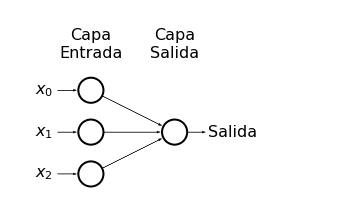

In [ ]:
draw_net(3,1, w=8)

## Construcción de la Red Neuronal Artificial: Función de Activación
En este ejemplo, usaremos la función de activación Sigmoidal (función logística).

Esta función se basa en la función de Euler:

In [ ]:
from math import e
print(e)

2.718281828459045


La función sigmoide:
$$\phi(z) = \frac{1}{1+e^{-z}}$$

In [ ]:
import math
def sigmoide(X):
  a = []
  for z in X:
    phi = (1/(1+math.exp(-z)))
    a.append(phi)
  return a  

In [ ]:
np.arange(0., 1., 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-50., 50., 1.)
phi = sigmoide(x)

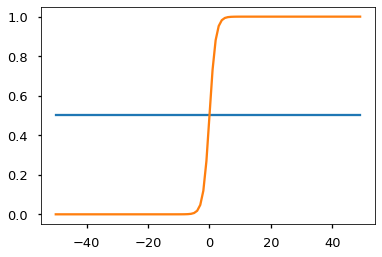

In [ ]:
#Umbral
Xaxis_linea = np.arange(-50., 50., 1.)
Yaxis_linea = [0.5]*len(Xaxis_linea)
plt.plot(Xaxis_linea, Yaxis_linea)

plt.plot(x,phi)
plt.show()

### Función de activación:

$$
sumatoria = \sum x_i w_i
$$

$$
\phi(\sum x_i w_i) = \frac{1}{1+e^{-\sum x_i w_i}}
$$

### Ensamble 3: ensamblando la función de activación a la neurona

In [ ]:
class Neurona():
  def __init__(self):
    self.W = [random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1)]

  def __sumatoria(self,X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma)  :
    return 1/1(1+math.exp(-suma))

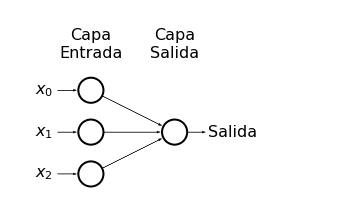

In [ ]:
draw_net(3,1, w=8)

### Ensamble 4: ensamblando la función "predict()" (test)

In [ ]:
class Neurona():
  def __init__(self):
    self.W = [random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1)]

  def __sumatoria(self,X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma)  :
    return 1/1(1+math.exp(-suma))

  def __predict(self, X):
    suma = self.__sumatoria(X)
    y_prob = self.__sigmoide(suma)
    return y_prob    

### Ensamble 5: ensamblando la función "fit()" (entrenamiento)

In [ ]:
class Neurona():
  def __init__(self):
    self.W = [random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1)]

  def __sumatoria(self,X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma)  :
    return 1/1(1+math.exp(-suma))

  def __predict(self, X):
    suma = self.__sumatoria(X)
    y_prob = self.__sigmoide(suma)
    return y_prob    

  def __fit(self, d_ent, epocas=10):
    for epoca in range(epocas):
      for ejemplo in d_ent:
        y_proba = self.__predict(ejemplo['X'])
        y_real = ejemplo['Y']
        error = y_real - y_proba

### Ensamble 6: ensamble de la gradiente

In [ ]:
class Neurona():
  def __init__(self):
    self.W = [random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1)]

  def __sumatoria(self,X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma)  :
    return 1/1(1+math.exp(-suma))

  def __predict(self, X):
    suma = self.__sumatoria(X)
    y_prob = self.__sigmoide(suma)
    return y_prob    

  def __fit(self, d_ent, epocas=10):
    for epoca in range(epocas):
      for ejemplo in d_ent:
        y_proba = self.__predict(ejemplo['X'])
        y_real = ejemplo['Y']
        error = y_real - y_proba

  def __gradiente(self, y_proba):
    return y_proba*(1-y_proba)

In [ ]:
def gradiente(y):
  return y*(1-y)

print("Proba\tGradiente")
prob = 0.0
while prob<=1.0:
  g = gradiente(prob)
  print("{:.2f}\t{:.2f}".format(prob, g))
  prob += 0.1

Proba	Gradiente
0.00	0.00
0.10	0.09
0.20	0.16
0.30	0.21
0.40	0.24
0.50	0.25
0.60	0.24
0.70	0.21
0.80	0.16
0.90	0.09
1.00	0.00


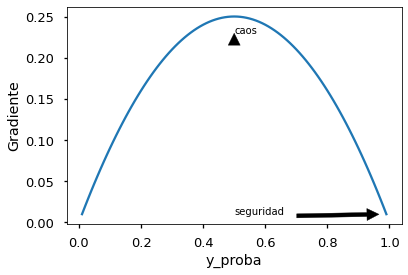

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
p = np.arange(0.01, 1.0, 0.01)
plt.xlabel('y_proba')
plt.ylabel('Gradiente')
plt.annotate('caos', xy=(0.5,0.23), xytext=(0.5,0.23), arrowprops=dict(facecolor='black', shrink=0.1))
plt.annotate('seguridad', xy=(1,0.01), xytext=(0.5,0.01), arrowprops=dict(facecolor='black', shrink=0.1))
plt.plot(p, gradiente(p));

### Ensamble 7: ajuste de pesos en la neurona

In [ ]:
class Neurona():
  def __init__(self):
    self.W = [random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1)]

  def __sumatoria(self,X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma)  :
    return 1/(1+math.exp(-suma))

  def predict(self, X):
    suma = self.__sumatoria(X)
    y_prob = self.__sigmoide(suma)
    return y_prob    

  def fit(self, d_ent, epocas=10):
    for epoca in range(epocas):
      for ejemplo in d_ent:
        #Predicción de los ejemplos del dataset de entrenamiento
        y_proba = self.predict(ejemplo['X'])
        y_real = ejemplo['Y']
        error = y_real - y_proba
        #Realizamos el ajuste de pesos
        for indice in range(len(self.W)):
          xi = ejemplo['X'][indice]
          ajuste_wi = xi*error* self.__gradiente(y_proba)
          self.W[indice] += ajuste_wi

  def __gradiente(self, y_proba):
    return y_proba*(1-y_proba)

### Primer test de la neurona

Nuestro dataset de entrenamiento es:

In [ ]:
#En Python:
d_ent = [
  { 'X':[0,0,1], 'Y':1 }, #ID 1
  { 'X':[1,0,0], 'Y':0 }, #ID 2
  { 'X':[0,1,0], 'Y':0 }, #ID 3
  { 'X':[1,1,1], 'Y':1 }, #ID 4
  { 'X':[0,1,1], 'Y':1 }, #ID 5
]

epocas = 2

neurona = Neurona()
neurona.fit(d_ent, epocas)

Nuestro dataset de test es: 

ID | $X_1$ | $X_2$ | $X_3$ | Y | Y_pred
--- | --- | --- | --- | --- | ---
1 | 1 | 0 | 1 | 1 | ?
2 | 0 | 0 | 0 | 0 | ?

In [ ]:
d_test = [
  { 'X':[1,0,1], 'Y':1 }, #ID 1
  { 'X':[0,0,0], 'Y':0 } #ID 2
]

#Revisando los ejemplos del dataset de test
print("y_proba\ty_pred\ty_real")
for ejemplo_test in d_test:
  X = ejemplo_test['X']
  y_real = ejemplo_test['Y']
  y_proba = neurona.predict(X)
  print("{:.2f}\t{:.0f}\t{}".format(y_proba, y_proba, y_real))

y_proba	y_pred	y_real
0.58	1	1
0.50	0	0


$y_{proba} = 0.5$ : ¿es **sano** ó **enfermo**?

### Ensamble 8: inclusión del bias en la neurona

In [ ]:
class Neurona():
  def __init__(self):
    self.W = [random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1)]
    self.bias = random.uniform(-1,1)

  def __sumatoria(self,X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma)  :
    return 1/(1+math.exp(-suma))

  def predict(self, X):
    suma = self.__sumatoria(X)
    y_prob = self.__sigmoide(suma) + self.bias
    return y_prob    

  def fit(self, d_ent, epocas=10):
    for epoca in range(epocas):
      for ejemplo in d_ent:
        #Predicción de los ejemplos del dataset de entrenamiento
        y_proba = self.predict(ejemplo['X'])
        y_real = ejemplo['Y']
        error = y_real - y_proba
        #Realizamos el ajuste de pesos
        for indice in range(len(self.W)):
          xi = ejemplo['X'][indice]
          ajuste_wi = xi*error* self.__gradiente(y_proba)
          self.W[indice] += ajuste_wi
        self.bias += error* self.__gradiente(y_proba)  

  def __gradiente(self, y_proba):
    return y_proba*(1-y_proba)

Volvemos a usar la neurona pero esta vez con **bias**:

In [ ]:
#Fase de Entrenamiento
d_ent = [
  { 'X':[0,0,1], 'Y':1 }, #ID 1
  { 'X':[1,0,0], 'Y':0 }, #ID 2
  { 'X':[0,1,0], 'Y':0 }, #ID 3
  { 'X':[1,1,1], 'Y':1 }, #ID 4
  { 'X':[0,1,1], 'Y':1 }, #ID 5
]

epocas = 2
neurona = Neurona()
neurona.fit(d_ent, epocas)

#Fase de Test
d_test = [
  { 'X':[1,0,1], 'Y':1 }, #ID 1
  { 'X':[0,0,0], 'Y':0 } #ID 2
]

#Resultados 
print("y_proba\ty_pred\ty_real")
for ejemplo_test in d_test:
  X = ejemplo_test['X']
  y_real = ejemplo_test['Y']
  y_proba = neurona.predict(X)
  print("{:.2f}\t{:.0f}\t{}".format(y_proba, y_proba, y_real))

y_proba	y_pred	y_real
0.74	1	1
0.60	1	0


- No está clasificando tan bien como esperábamos.
- Tenemos 50% de exactitud (accuracy)

In [ ]:
#Fase de Entrenamiento
d_ent = [
  { 'X':[0,0,1], 'Y':1 }, #ID 1
  { 'X':[1,0,0], 'Y':0 }, #ID 2
  { 'X':[0,1,0], 'Y':0 }, #ID 3
  { 'X':[1,1,1], 'Y':1 }, #ID 4
  { 'X':[0,1,1], 'Y':1 }, #ID 5
]

epocas = 2
neurona = Neurona()

antiguos_pesos = neurona.W.copy()
print("Pesos antiguos: ", antiguos_pesos)
bias_antiguo = neurona.bias

#Fase de entrenamiento:
neurona.fit(d_ent, epocas)
print("Pesos nuevos: ", neurona.W)
#Fase de Test
d_test = [
  { 'X':[1,0,1], 'Y':1 }, #ID 1
  { 'X':[0,0,0], 'Y':0 } #ID 2
]

#Resultados 
print("y_proba\ty_pred\ty_real")
for ejemplo_test in d_test:
  X = ejemplo_test['X']
  y_real = ejemplo_test['Y']
  y_proba = neurona.predict(X)
  print("{:.2f}\t{:.0f}\t{}".format(y_proba, y_proba, y_real))

Pesos antiguos:  [0.8189330352815214, -0.44605544519340357, 0.1805735445762724]
Pesos nuevos:  [0.7802315197841924, -0.10841592092879487, 0.8639084785865871]
y_proba	y_pred	y_real
0.90	1	1
0.56	1	0


## Vamos el caso con dos features

In [ ]:
ejemplos_entrenamiento = [
    { 'X':[0,1], 'Y':1 }, #ID 1
    { 'X':[1,0], 'Y':0 }, #ID 2
    { 'X':[0,0], 'Y':0 }, #ID 3
    { 'X':[1,1], 'Y':1 }, #ID 4
    { 'X':[0,1], 'Y':1 }, #ID 5                 
]

In [ ]:
class Neurona():
  def __init__(self):
    self.W = [random.uniform(-1,1), random.uniform(-1,1)]
    self.bias = random.uniform(-1,1)

  def __sumatoria(self,X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma  

  def __sigmoide(self,suma)  :
    return 1/(1+math.exp(-suma))

  def predict(self, X):
    suma = self.__sumatoria(X)
    y_prob = self.__sigmoide(suma) + self.bias
    return y_prob    

  def fit(self, d_ent, epocas=10):
    for epoca in range(epocas):
      for ejemplo in d_ent:
        #Predicción de los ejemplos del dataset de entrenamiento
        y_proba = self.predict(ejemplo['X'])
        y_real = ejemplo['Y']
        error = y_real - y_proba
        #Realizamos el ajuste de pesos
        for indice in range(len(self.W)):
          xi = ejemplo['X'][indice]
          ajuste_wi = xi*error* self.__gradiente(y_proba)
          self.W[indice] += ajuste_wi
        self.bias += error* self.__gradiente(y_proba)  

  def __gradiente(self, y_proba):
    return y_proba*(1-y_proba)

In [ ]:
neurona1 = Neurona()
print("Pesos: ", neurona1.W)
W_antiguo = neurona1.W.copy()
bias_antiguo = neurona1.bias
#Entrenamiento
neurona1.fit(ejemplos_entrenamiento, 2)
print("Nuevos pesos:", neurona1.W)
ejemplo_test = [0,1]
y_proba = neurona1.predict(ejemplo_test)
print("Respuesta: ", y_proba )

Pesos:  [-0.32299907703601427, 0.09305791988425027]
Nuevos pesos: [-0.3364533970064766, 0.5361299603465352]
Respuesta:  0.7895983136683613


In [ ]:
tam = len(ejemplos_entrenamiento)
x_eje_enf = []
y_eje_enf = []

x_eje_sano = []
y_eje_sano = []

clases = []
for i in range(tam):
  X = ejemplos_entrenamiento[i]['X']
  Y = ejemplos_entrenamiento[i]['Y']
  #print("{}\t{}".format(X,Y))
  if Y==1: #enfermo
    x_eje_enf.append(X[0])
    y_eje_enf.append(X[1])
  else: #sano
    x_eje_sano.append(X[0])
    y_eje_sano.append(X[1])
  clases.append(Y)



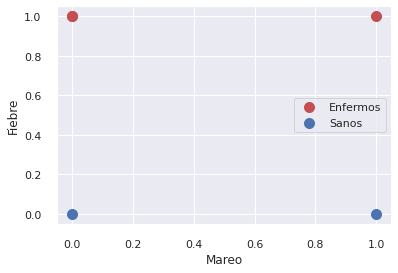

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

plt.scatter(x_eje_enf, y_eje_enf, color='r', s=100, cmap='autumn', label='Enfermos');
plt.scatter(x_eje_sano, y_eje_sano, color='b', s=100, cmap='autumn', label='Sanos');
plt.xlabel('Mareo')
plt.ylabel('Fiebre')

plt.legend()

La ecuación del hiperplano es:

$$
w_1 \times X_1 + w_2 \times X_2 + \theta = 0
$$

En dos dimensiones, tenemos lo siguiente:
$$
X_2 = \frac{w_1}{w_2}x_1 - \frac{\theta}{w_2}
$$
donde:
- pendiente: $-\frac{w_1}{w_2}$
- intercepto: $-\frac{\theta}{w_2}$

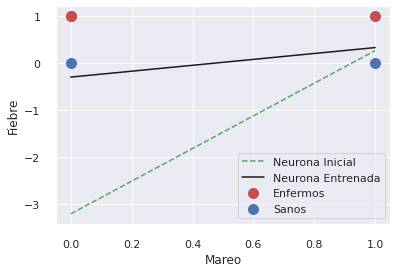

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

plt.scatter(x_eje_enf, y_eje_enf, color='r', s=100, cmap='autumn', label='Enfermos');
plt.scatter(x_eje_sano, y_eje_sano, color='b', s=100, cmap='autumn', label='Sanos');
plt.xlabel('Mareo')
plt.ylabel('Fiebre')

#Graficamos la recta original: W_antiguo, bias_antiguo
m, b = -1*(W_antiguo[0]/W_antiguo[1]), -1*(bias_antiguo/W_antiguo[1])
x = np.linspace(0,1,10)
linea_inicial = plt.plot(x, x*m+b, '--', color='g', label='Neurona Inicial')

#Graficamos la recta después del entrenamiento
m, b = -1*(neurona1.W[0]/neurona1.W[1]), -1*(neurona1.bias/neurona1.W[1])
x = np.linspace(0,1,10)
linea_entrenada = plt.plot(x, x*m+b, color='k', label='Neurona Entrenada')

plt.legend()

# Usando Scikit-Learn

In [ ]:
import pandas as pd
from google.colab import files
subido = files.upload()
import io
pima = pd.read_csv(io.BytesIO(subido['diabetes.csv']))
X = pima.iloc[:,0:8]
Y = pima.iloc[:,8]

Saving diabetes.csv to diabetes.csv


In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              1       85             66  ...  26.6                     0.351   31
1              8      183             64  ...  23.3                     0.672   32
2              1       89             66  ...  28.1                     0.167   21
3              0      137             40  ...  43.1                     2.288   33
4              5      116             74  ...  25.6                     0.201   30
..           ...      ...            ...  ...   ...                       ...  ...
762           10      101             76  ...  32.9                     0.171   63
763            2      122             70  ...  36.8                     0.340   27
764            5      121             72  ...  26.2                     0.245   30
765            1      126             60  ...  30.1                     0.349   47
766            1       93             70  ...  30.4                     0.315   23

[76

In [ ]:
print(Y)

0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: Class, Length: 767, dtype: int64


In [ ]:
#Para redes neuronales, debemos normalizar o estandarizar las entradas
from sklearn.preprocessing import StandardScaler
estandarizacion = StandardScaler().fit_transform(X)
X_nuevo = pd.DataFrame(data=estandarizacion, columns=X.columns)
X_nuevo.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.843726,-1.122086,-0.160249,0.532023,-0.693559,-0.683729,-0.364265,-0.188940
1,1.234240,1.944476,-0.263578,-1.286882,-0.693559,-1.102301,0.604701,-0.103795
2,-0.843726,-0.996920,-0.160249,0.155698,0.122357,-0.493469,-0.919684,-1.040393
3,-1.140579,0.505069,-1.503534,0.908349,0.764674,1.409132,5.482732,-0.018650
4,0.343683,-0.152051,0.253070,-1.286882,-0.693559,-0.810569,-0.817052,-0.274086


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X_nuevo, Y, test_size=0.2)
modelos = []

mlp1 = MLPClassifier(hidden_layer_sizes=(5,2), max_iter=500)
kfold = KFold(n_splits=10)
cv_resultado = cross_val_score(mlp1, X_train, Y_train, cv=kfold, scoring='accuracy')
print(cv_resultado)

mlp2 = MLPClassifier(hidden_layer_sizes=(8,2), max_iter=500)
kfold = KFold(n_splits=10)
cv_resultado = cross_val_score(mlp2, X_train, Y_train, cv=kfold, scoring='accuracy')
print(cv_resultado)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.67741935 0.80645161 0.69354839 0.85245902 0.68852459 0.72131148
 0.80327869 0.72131148 0.75409836 0.80327869]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.75806452 0.82258065 0.67741935 0.81967213 0.73770492 0.70491803
 0.83606557 0.7704918  0.72131148 0.81967213]


In [ ]:
min(cv_resultado)

0.6451612903225806

In [ ]:
max(cv_resultado)

0.819672131147541

### Error



In [ ]:
#Los resultados obtenidos por la neurona en el ejercicio anterior
y_proba = [0.74, 0.6]
y_real = [1., 0.]
y_pred = [1., 1.]

accruacy = 0
error = 0
for i in range(len(y_real)):
  if y_real[i] == y_pred[i]:
    accruacy+= 1

  error += (y_real[i] - y_proba[i])**2
accruacy /= len(y_real)    
error /= 2
print("La exactitud es: {}".format(accruacy))
print("El error es: {}".format(error))




La exactitud es: 0.5
El error es: 0.2138


## Caso: AND

$X_1$ | $X_2$ | $X_1$ AND $X_2$
--- | --- | ---
0 | 0 | 0
1 | 0 | 0
0 | 1 | 0
1 | 1 | 1

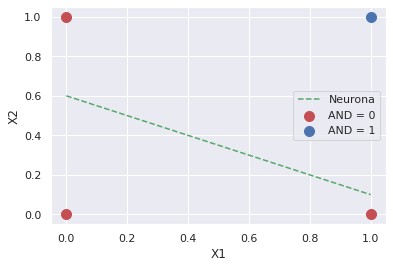

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

plt.scatter([0,1,0], [0,0,1], color='r', s=100, cmap='autumn', label='AND = 0');
plt.scatter([1], [1], color='b', s=100, cmap='autumn', label='AND = 1');
plt.xlabel('X1')
plt.ylabel('X2')

#Graficamos la recta original: W_antiguo, bias_antiguo
m, b = -0.5, 0.6
x = np.linspace(0,1,10)
linea_inicial = plt.plot(x, x*m+b, '--', color='g', label='Neurona')

plt.legend()

## Caso XOR

$X_1$ | $X_2$ | $X_1$ XOR $X_2$
--- | --- | ---
0 | 0 | 0
1 | 0 | 1
0 | 1 | 1
1 | 1 | 0

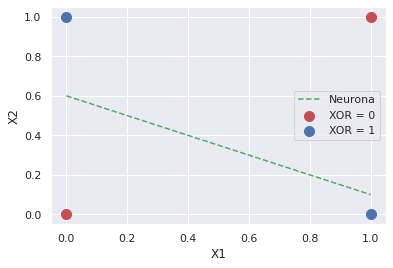

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

plt.scatter([0,1], [0,1], color='r', s=100, cmap='autumn', label='XOR = 0');
plt.scatter([1,0], [0,1], color='b', s=100, cmap='autumn', label='XOR = 1');
plt.xlabel('X1')
plt.ylabel('X2')

#Graficamos la recta original: W_antiguo, bias_antiguo
m, b = -0.5, 0.6
x = np.linspace(0,1,10)
linea_inicial = plt.plot(x, x*m+b, '--', color='g', label='Neurona')

plt.legend()

# Recordadno Función de Activación

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def logistica(x): return 1/(1+math.exp(-x))
def tanh(x): return math.tanh(x)
def relu(x): return 0 if x < 0 else x
def binaria(x): return 0 if x<0 else 1
def identidad(x): return x

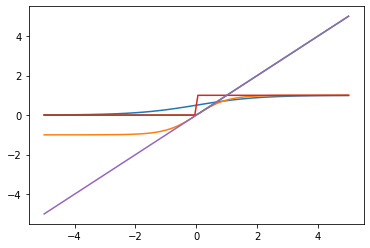

In [ ]:
x = np.linspace(-5,5,100)
vlogistica = [logistica(i) for i in x]
vtanh = [tanh(i) for i in x]
vrelu = [relu(i) for i in x]
vbinaria = [binaria(i) for i in x]
videntidad = [identidad(i) for i in x]

plt.plot(x,vlogistica)
plt.plot(x,vtanh)
plt.plot(x,vrelu)
plt.plot(x,vbinaria)
plt.plot(x,videntidad)


In [ ]:
import pandas as pd
from google.colab import files
subido = files.upload()
import io
pima = pd.read_csv(io.BytesIO(subido['diabetes.csv']))
X = pima.iloc[:,0:8]
Y = pima.iloc[:,8]


Saving diabetes.csv to diabetes.csv


In [ ]:
from google.colab import data_table
data_table.DataTable(pima)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [ ]:

#Para redes neuronales, debemos normalizar o estandarizar las entradas
from sklearn.preprocessing import StandardScaler
estandarizacion = StandardScaler().fit_transform(X)
X_nuevo = pd.DataFrame(data=estandarizacion, columns=X.columns)
X_nuevo.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.843726,-1.122086,-0.160249,0.532023,-0.693559,-0.683729,-0.364265,-0.188940
1,1.234240,1.944476,-0.263578,-1.286882,-0.693559,-1.102301,0.604701,-0.103795
2,-0.843726,-0.996920,-0.160249,0.155698,0.122357,-0.493469,-0.919684,-1.040393
3,-1.140579,0.505069,-1.503534,0.908349,0.764674,1.409132,5.482732,-0.018650
4,0.343683,-0.152051,0.253070,-1.286882,-0.693559,-0.810569,-0.817052,-0.274086


# Red neuronal multicapa

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X_nuevo, Y, test_size=0.2)

#Definimos la arquitectura de la RNA
mlp1 = MLPClassifier(hidden_layer_sizes=(1,), max_iter=1, learning_rate_init=0.3, activation='logistic')

#Muestreo para que se entrene y se evalúe 10 veces
k = 10
kfold = KFold(n_splits=k)
cv_resultado = cross_val_score(mlp1, X_train, Y_train, cv=kfold, scoring='f1_macro')
print(cv_resultado)

[0.36734694 0.41509434 0.39215686 0.41904762 0.37755102 0.56839623
 0.38383838 0.36458333 0.39       0.41904762]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/loc

In [ ]:
print(cv_resultado)

[0.36734694 0.41509434 0.39215686 0.41904762 0.37755102 0.56839623
 0.38383838 0.36458333 0.39       0.41904762]


In [ ]:
promedio = np.mean(cv_resultado)

In [ ]:
print(promedio)

0.4097062343233463


Entrenando una red neuronal:
- #entradas: 8
- salida: 1

- tasa de aprendizaje: 0.3
- épocas : 1
- activación: logística
- #capas ocultas: 1

- promedio de F1: 0.41

### Revisemos la RNA paso a paso: explorando su arquitectura y características

In [ ]:
#Configuración de la arquitectura de la red neuronal
mlp1 = MLPClassifier(hidden_layer_sizes=(1,), max_iter=1, learning_rate_init=0.3, activation='logistic')

In [ ]:
#Entrenamiento de la RNA, usando épocas=1, tasa de aprendizaje = 0.3, función de activación: logística
mlp1.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1,), learning_rate='constant',
              learning_rate_init=0.3, max_fun=15000, max_iter=1, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
mlp1.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
mlp1.coefs_

[array([[ 0.90570502],
        [ 1.1916302 ],
        [-0.10432584],
        [ 0.06478627],
        [-0.03369104],
        [ 1.35234974],
        [ 1.43820387],
        [ 1.30617036]]), array([[0.65074792]])]

In [ ]:
X_nuevo.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.843726,-1.122086,-0.160249,0.532023,-0.693559,-0.683729,-0.364265,-0.188940
1,1.234240,1.944476,-0.263578,-1.286882,-0.693559,-1.102301,0.604701,-0.103795
2,-0.843726,-0.996920,-0.160249,0.155698,0.122357,-0.493469,-0.919684,-1.040393
3,-1.140579,0.505069,-1.503534,0.908349,0.764674,1.409132,5.482732,-0.018650
4,0.343683,-0.152051,0.253070,-1.286882,-0.693559,-0.810569,-0.817052,-0.274086


In [ ]:
mlp1.intercepts_

[array([-0.2712721]), array([-0.93192184])]

## Exploremos otra RNA 

In [ ]:
#Definimos la arquitectura de la RNA
mlp2 = MLPClassifier(hidden_layer_sizes=(8,), max_iter=10, learning_rate_init=0.3, activation='logistic')

Revisemos nuestra nueva RNA:

In [ ]:
mlp2.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8,), learning_rate='constant',
              learning_rate_init=0.3, max_fun=15000, max_iter=10, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
mlp2.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
mlp2.coefs_

[array([[-1.50463426, -1.01227127, -0.78547184,  0.15094973,  0.66138884,
         -0.17707762,  0.77775174, -2.26981206],
        [-3.68759245, -3.88298232, -3.89818568,  3.77704693,  1.00612038,
         -3.66424706,  0.91679621, -3.69602367],
        [-0.03185964, -0.19788574,  1.17253188, -0.43661091, -1.73984394,
          1.46830734, -2.89951755, -0.48403737],
        [ 0.6247315 ,  0.07364949, -0.22554812, -0.07810773,  1.98088862,
         -0.62050084,  1.49545138,  0.99978368],
        [ 1.46502343,  0.92681383, -0.92650392, -0.06822823, -3.04725187,
         -1.59151179,  3.29517242,  2.03137489],
        [-0.354688  , -0.72004583, -2.08854545,  3.40231254,  0.60302645,
         -2.75039504,  2.01634158, -0.52034543],
        [-1.01759036, -0.71967548, -1.22378487,  2.33506964,  0.38514868,
         -1.64258   ,  1.79559288, -0.76865299],
        [-3.27436093, -3.37848942, -2.13061521, -0.15267859, -1.96443787,
         -1.97265375, -0.99007917, -3.35562803]]), array([[-0.564

In [ ]:
mlp2.intercepts_

[array([-1.49377291, -2.52927675, -1.60190367, -2.46507938, -4.19358162,
        -1.62585163, -2.53155045, -0.82889046]), array([-0.22332505])]

Ahora revisamos qué tan bien se desenvuelve con nuestro dataset de Diabetes:

In [ ]:
k = 10
kfold = KFold(n_splits=k)
cv_resultado = cross_val_score(mlp2, X_train, Y_train, cv=kfold, scoring='f1_macro')


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

In [ ]:
print(cv_resultado)

[0.77728654 0.74125201 0.7995886  0.74583333 0.7511655  0.67553191
 0.62804878 0.72522523 0.63302139 0.73245614]


In [ ]:
promedio = np.mean(cv_resultado)
print("Promedio: ", promedio)

Promedio:  0.7209409433790849


Entrenando una red neuronal:
- #entradas: 8
- salida: 1

- tasa de aprendizaje: 0.3
- épocas : 10
- activación: logística
- #capas ocultas: 1 con 8 neuronas

- promedio de F1: 0.72

Nuestro MLP1 se parece (mas no es igual) a :

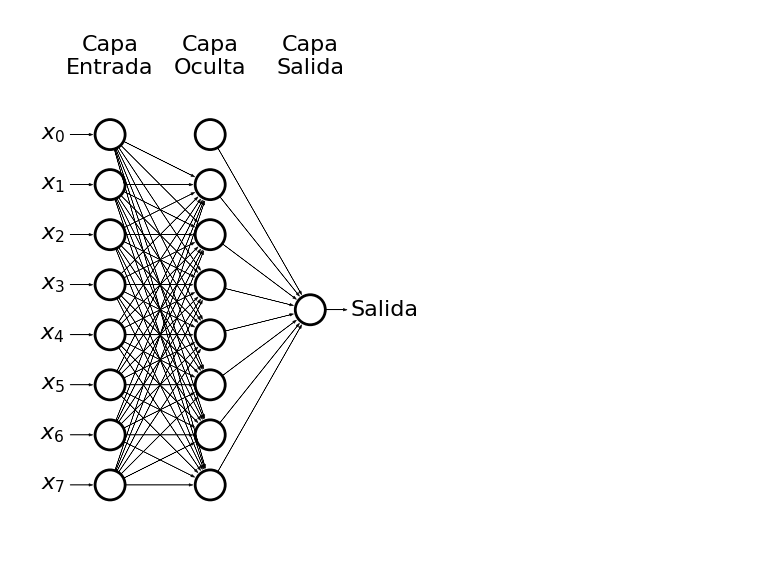

In [ ]:
draw_net(8,1, [8], w=15, h=10)

Veamos otra RNA:

In [ ]:
#Definimos la arquitectura de la RNA
mlp3 = MLPClassifier(hidden_layer_sizes=(8,4), max_iter=10, learning_rate_init=0.3, activation='logistic')

In [ ]:
mlp3.fit(X_train, Y_train)
mlp3.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
mlp3.coefs_

[array([[-2.74435872, -2.14533218, -2.03144164,  1.74821566, -2.63965135,
          1.61548092,  0.23658945,  3.34557272],
        [-3.06782876, -5.20360151, -2.18200014,  3.93266254, -5.3384874 ,
          5.0799993 , -3.86333895,  1.97767382],
        [ 0.02378311,  0.44425356, -0.53728187, -0.74801935, -2.24974392,
         -0.20605979,  0.4854237 , -1.39957163],
        [ 1.81255011, -0.75501709,  1.094307  , -2.00042794, -0.99672685,
         -0.62626298,  0.61396953, -0.97079091],
        [ 0.54886501,  0.17911803, -0.84289384, -0.23169044, -0.72885612,
         -0.98172237, -0.52151795, -1.69523091],
        [-2.30546359, -3.45897461, -2.16734035,  2.49830153, -4.20034249,
          1.7656704 , -3.06608836,  0.68452669],
        [-0.59454202, -1.56042438, -0.41423365,  1.02449027, -2.9553728 ,
          0.16698624, -3.82849889, -1.37198728],
        [-2.09688787, -2.10212978, -0.82452294,  2.19800096, -2.0863745 ,
          1.12199198, -2.08621952,  0.65575117]]),
 array([[ 0.52

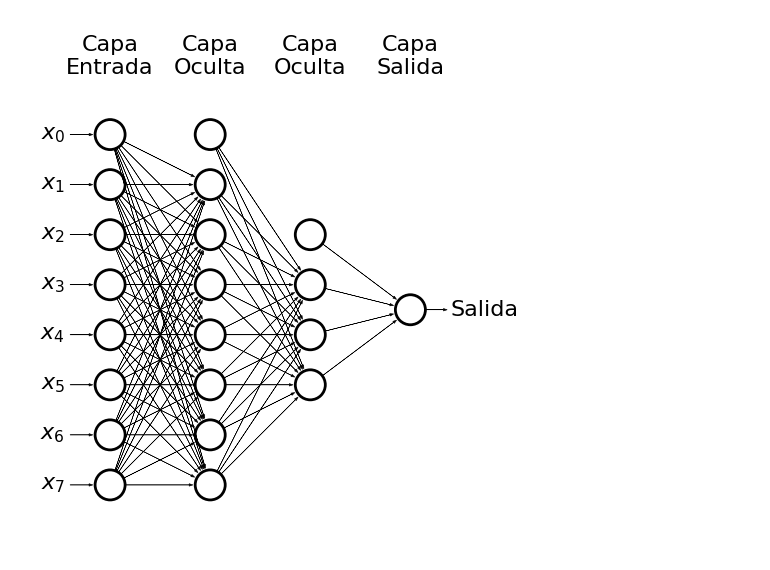

In [ ]:
draw_net(8,1,[8,4], w=15, h=10)

Verifiquemos cómo se desenvuelve nuestra MPL3:

In [ ]:
k = 10
kfold = KFold(n_splits=k)
cv_resultado = cross_val_score(mlp3, X_train, Y_train, cv=kfold, scoring='f1_macro')


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

In [ ]:
print(cv_resultado)

[0.77327707 0.77289377 0.75020145 0.77898551 0.69087838 0.7059696
 0.65102975 0.66775599 0.67564693 0.74583333]


In [ ]:
promedio = np.mean(cv_resultado)

In [ ]:
print("Promedio: ", promedio)

Promedio:  0.7212471785965793


## Conclusión preliminar
- Entre las 3 RNAs: MLP1, MLP2 y MLP3; nos quedaríamos hasta el momento con la MLP2 que tiene un desempeño similar en F1 que la MLP3 pero es menos complejo.
- NO obstante, debemos seguir probando el entrenamiento de otras MLPs con diferentes tasas de aprendizaje, épocas y número de capas ocultas y número de neuronas en ellas.
- Se recomienda seguir explorando mejores modelos.

# Regularización de Coeficientes

In [ ]:
import pandas as pd
from google.colab import files
subido = files.upload()
import io
pima = pd.read_csv(io.BytesIO(subido['diabetes.csv']))
X = pima.iloc[:,0:8]
Y = pima.iloc[:,8]


Saving diabetes.csv to diabetes.csv


In [ ]:
import pandas as pd
from google.colab import files
subido = files.upload()
import io
pima = pd.read_csv(io.BytesIO(subido['diabetes.csv']))
X = pima.iloc[:,0:8]
Y = pima.iloc[:,8]


Saving diabetes.csv to diabetes (1).csv


In [ ]:
from google.colab import data_table
data_table.DataTable(pima)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [ ]:

#Para redes neuronales, debemos normalizar o estandarizar las entradas
from sklearn.preprocessing import StandardScaler
estandarizacion = StandardScaler().fit_transform(X)
X_nuevo = pd.DataFrame(data=estandarizacion, columns=X.columns)
X_nuevo.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.843726,-1.122086,-0.160249,0.532023,-0.693559,-0.683729,-0.364265,-0.188940
1,1.234240,1.944476,-0.263578,-1.286882,-0.693559,-1.102301,0.604701,-0.103795
2,-0.843726,-0.996920,-0.160249,0.155698,0.122357,-0.493469,-0.919684,-1.040393
3,-1.140579,0.505069,-1.503534,0.908349,0.764674,1.409132,5.482732,-0.018650
4,0.343683,-0.152051,0.253070,-1.286882,-0.693559,-0.810569,-0.817052,-0.274086


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X_nuevo, Y, test_size=0.2)

## Mejores Redes Neuronales Multicapa

capas escondidas | épocas | tasa aprendizaje | F1 (10-fold cv)
--- | --- | --- | ---
(2) | 1 | 0.3 | 0.40
(8) | 1 | 0.3 | 0.57
(8,8) | 1 | 0.3 | 0.42
(8,16) | 1 | 0.3 | 0.41
(8,16,8) | 1 | 0.3 | 0.40
--- | --- | --- | ---
(2) | 10 | 0.3 | 0.69
(8) | 10 | 0.3 | 0.72
(8,8) | 10 | 0.3 | 0.68
(8,16) | 10 | 0.3 | 0.69
(8,16,8) | 10 | 0.3 | 0.59
--- | --- | --- | ---
(2) | 100 | 0.3 | 0.71
(8) | 100 | 0.3 | 0.70
(8,8) | 100 | 0.3 | 0.69
(8,16) | 100 | 0.3 | 0.68
(8,16,8) | 100 | 0.3 | 0.72
--- | --- | --- | ---
(2) | 100 | 0.01 | 0.72
(8) | 100 | 0.01 | 0.73
(8,8) | 100 | 0.01 | 0.72
(8,16) | 100 | 0.01 | 0.72
(8,16,8) | 100 | 0.01 | 0.72
--- | --- | --- | ---
(2) | 100 | 0.001 | 0.43
(8) | 100 | 0.001 | 0.57
(8,8) | 100 | 0.001 | 0.41
(8,16) | 100 | 0.001 | 0.44
(8,16,8) | 100 | 0.001 | 0.40
--- | --- | --- | ---
(2) | 1000 | 0.001 | 0.70
(8) | 1000 | 0.001 | 0.71
(8,8) | 1000 | 0.001 | 0.72
(8,16) | 1000 | 0.001 | 0.73
(8,16,8) | 1000 | 0.001 | 0.68
--- | --- | --- | ---
(2) | 5000 | 0.001 | 0.71
(8) | 5000 | 0.001 | 0.71
(8,8) | 5000 | 0.001 | 0.73
(8,16) | 5000 | 0.001 | 0.73
(8,16,8) | 5000 | 0.001 | 0.68


In [ ]:
MLPs = []

mlp1 = MLPClassifier(hidden_layer_sizes=(2,), max_iter=5000, learning_rate_init=0.001, activation='logistic')
mlp2 = MLPClassifier(hidden_layer_sizes=(8,), max_iter=5000, learning_rate_init=0.001, activation='logistic')
mlp3 = MLPClassifier(hidden_layer_sizes=(8,8), max_iter=5000, learning_rate_init=0.001, activation='logistic')
mlp4 = MLPClassifier(hidden_layer_sizes=(8,16), max_iter=5000, learning_rate_init=0.001, activation='logistic')
mlp5 = MLPClassifier(hidden_layer_sizes=(8,16,8), max_iter=5000, learning_rate_init=0.001, activation='logistic')

MLPs.append(mlp1)
MLPs.append(mlp2)
MLPs.append(mlp3)
MLPs.append(mlp4)
MLPs.append(mlp5)

promedios = []
for mlp in MLPs:
  mlp.fit(X_train, Y_train)
  k = 10
  kfold = KFold(n_splits=k)
  cv_resultado = cross_val_score(mlp, X_train, Y_train, cv=kfold, scoring='f1_macro')
  promedio = np.mean(cv_resultado)
  promedios.append(promedio)

print("Promedios")
for i in range(len(promedios)):
  print("F1 de MLP{} = {:.2f}".format((i+1), promedios[i]))



Promedios
F1 de MLP1 = 0.71
F1 de MLP2 = 0.71
F1 de MLP3 = 0.73
F1 de MLP4 = 0.73
F1 de MLP5 = 0.68


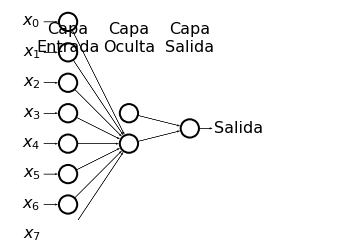

In [ ]:
draw_net(8, 1, [2], w=11, h=6)

In [ ]:


print("Promedios")
for i in range(len(promedios)):
  print("F1 de MLP{} = {}".format((i+1), promedios[i]))


Promedios
F1 de MLP1 = 0.4002763125575802
F1 de MLP2 = 0.5114738941270334
F1 de MLP3 = 0.45150821529221774
F1 de MLP4 = 0.4089695746086138
F1 de MLP5 = 0.4002763125575802


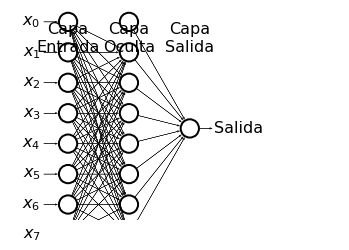

In [ ]:
draw_net(8, 1, [8], w=11, h=6)

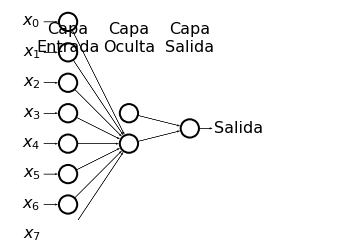

In [ ]:
draw_net(8, 1, [2], w=11, h=6)

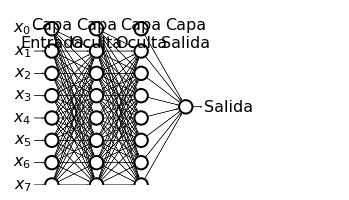

In [ ]:
draw_net(8, 1, [8, 8], w=15, h=7)

# Mapas Auto-organizados

In [ ]:
import pandas as pd
from google.colab import files
subido = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(subido['Credit_Card_Applications.csv']))

Saving Credit_Card_Applications.csv to Credit_Card_Applications.csv


In [ ]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
dataset.shape

(690, 16)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [ ]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.5-cp36-none-any.whl size=8474 sha256=044089095032bd6d34b2239e4b08b12b07f5e52d22f518462c5577142dfb7c0d
  Stored in directory: /root/.cache/pip/wheels/39/5b/16/cc9402ffc58cafb1da6997e5c94b1bde65e8cb214907879fd4
Successfully built minisom


In [ ]:
from minisom import MiniSom

In [ ]:
len(X)

690

In [ ]:
len(X[0])

15

In [ ]:
num_atributos = len(X[0])
som = MiniSom(x=10, y=10, input_len=num_atributos, learning_rate=0.5)

In [ ]:
som.random_weights_init(X)

In [ ]:
som.train_random(data=X, num_iteration=100)

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()

<Figure size 432x288 with 0 Axes>

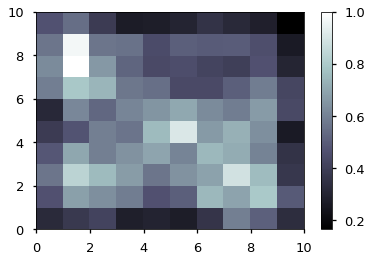

In [ ]:
pcolor(som.distance_map().T)
colorbar()

In [ ]:
num_instancias = len(X)
num_atributos = len(X[0])
print("num_instancias: ", num_instancias)
print("num_atributos: ", num_atributos)

num_instancias:  690
num_atributos:  15


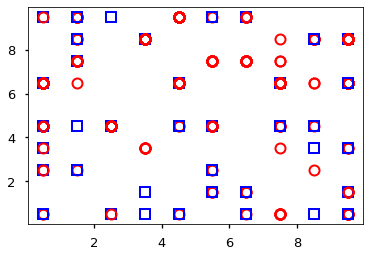

In [ ]:
marcadores = ['o', 's']
colors = ['r', 'b']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5, w[1]+0.5, marcadores[y[i]], markeredgecolor=colors[y[i]], markerfacecolor='None', markersize=10, markeredgewidth=2 )
show()

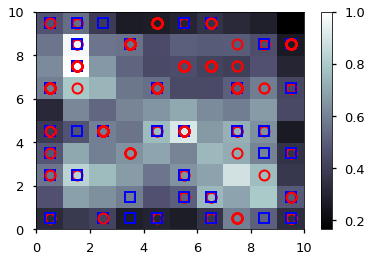

In [ ]:
pcolor(som.distance_map().T)
colorbar()
marcadores = ['o', 's']
colors = ['r', 'b']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5, w[1]+0.5, marcadores[y[i]], markeredgecolor=colors[y[i]], markerfacecolor='None', markersize=10, markeredgewidth=2 )
show()

In [ ]:
def reportar(X):
  for x in X:
    for y in x:
      print("{}".format(y), end='\t')
    print("")  
    

In [ ]:
reportar(X)

0.8426814667099194	1.0	0.12526315789473683	0.4092857142857143	0.5	0.23076923076923078	0.375	0.055614035087719296	0.0	0.0	0.0	1.0	0.5	0.05	0.01212	
0.6960905621693954	0.0	0.1341353383458647	0.25	0.5	0.5384615384615385	0.375	0.005789473684210527	0.0	0.0	0.0	0.0	0.5	0.08	0.0	
0.3889816561152344	0.0	0.23804511278195487	0.0625	0.0	0.23076923076923078	0.375	0.043859649122807015	0.0	0.0	0.0	1.0	0.5	0.14	0.0	
0.48842545319126174	0.0	0.11909774436090229	0.4107142857142857	0.0	0.3076923076923077	0.25	0.0	1.0	1.0	0.16417910447761194	1.0	0.5	0.0	0.0	
0.6007952620640822	1.0	0.09654135338345868	0.29178571428571426	0.5	0.38461538461538464	0.375	0.0687719298245614	1.0	1.0	0.208955223880597	0.0	0.5	0.03	0.00158	
0.021651470193695843	0.0	0.031278195488721794	0.02089285714285714	0.5	0.5384615384615385	0.875	0.05263157894736842	1.0	1.0	0.029850746268656716	0.0	0.5	0.05	0.0	
0.6437057770623369	1.0	0.055187969924812036	0.23214285714285712	0.5	0.15384615384615385	0.375	0.0043859649122807015	0.0	0.0	0.0	0.0	0

In [ ]:
mapeo = som.win_map(X)
patrones = np.concatenate((mapeo[(1,6)], mapeo[(3,3)]), axis = 0)
patrones = sc.inverse_transform(patrones)

In [ ]:
reportar(patrones)

15788215.0	1.0	31.57	0.375	2.0	2.0	4.0	0.875	1.0	0.0	0.0	1.0	1.0	928.0	1.0	
15570990.0	1.0	29.42	1.25	2.0	8.0	8.0	0.25	0.0	1.0	2.0	1.0	2.0	400.0	109.0	
15694237.0	1.0	29.58	4.75	2.0	7.000000000000001	4.0	2.0	0.0	1.0	1.0	1.0	2.0	460.0	69.0	
15692718.0	1.0	22.17	12.125	2.0	8.0	4.0	3.335	0.0	1.0	2.0	1.0	2.0	180.0	174.0	
15618703.0	1.0	25.67	3.25	2.0	8.0	8.0	2.29	0.0	1.0	1.0	1.0	2.0	416.0	22.0	
15677395.0	1.0	19.33	10.915	2.0	8.0	5.0	0.585	0.0	1.0	2.0	1.0	2.0	200.0	8.0	
15583724.0	1.0	25.92	0.875	2.0	4.0	4.0	0.375	0.0	1.0	2.0	1.0	2.0	174.0	4.0	


In [ ]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


# PLN

In [ ]:
import nltk

In [ ]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> alpino
      Unzipping corpora/alpino.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt
      Unzipping tokenizers/punkt.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> abc
      

True

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
import urllib.request

In [ ]:
response = urllib.request.urlopen('https://librefinanciero.com')

In [ ]:
html = response.read()
print(html)

b'<!DOCTYPE html>\r\n<html lang="en-US">\r\n<head>\r\n\t<meta charset="UTF-8">\r\n\t<meta name="viewport" content="width=device-width, initial-scale=1">\r\n\t<link rel="profile" href="https://gmpg.org/xfn/11">\r\n\t<style type="text/css">\t\t\t.heateorSssInstagramBackground{background:radial-gradient(circle at 30% 107%,#fdf497 0,#fdf497 5%,#fd5949 45%,#d6249f 60%,#285aeb 90%)}\n\t\t\t\t\t\t\t\t\t\t\t.heateor_sss_horizontal_sharing .heateorSssSharing,.heateor_sss_standard_follow_icons_container .heateorSssSharing{\n\t\t\t\t\t\t\tcolor: #fff;\n\t\t\t\t\t\tborder-width: 0px;\n\t\t\tborder-style: solid;\n\t\t\tborder-color: transparent;\n\t\t}\n\t\t\t\t.heateor_sss_horizontal_sharing .heateorSssTCBackground{\n\t\t\tcolor:#666;\n\t\t}\n\t\t\t\t.heateor_sss_horizontal_sharing .heateorSssSharing:hover,.heateor_sss_standard_follow_icons_container .heateorSssSharing:hover{\n\t\t\t\t\t\tborder-color: transparent;\n\t\t}\n\t\t.heateor_sss_vertical_sharing .heateorSssSharing,.heateor_sss_floating_

In [ ]:
soup = BeautifulSoup(html, 'html5lib')
texto = soup.get_text(strip=True)
print(texto)

.heateorSssInstagramBackground{background:radial-gradient(circle at 30% 107%,#fdf497 0,#fdf497 5%,#fd5949 45%,#d6249f 60%,#285aeb 90%)}
											.heateor_sss_horizontal_sharing .heateorSssSharing,.heateor_sss_standard_follow_icons_container .heateorSssSharing{
							color: #fff;
						border-width: 0px;
			border-style: solid;
			border-color: transparent;
		}
				.heateor_sss_horizontal_sharing .heateorSssTCBackground{
			color:#666;
		}
				.heateor_sss_horizontal_sharing .heateorSssSharing:hover,.heateor_sss_standard_follow_icons_container .heateorSssSharing:hover{
						border-color: transparent;
		}
		.heateor_sss_vertical_sharing .heateorSssSharing,.heateor_sss_floating_follow_icons_container .heateorSssSharing{
							color: #fff;
						border-width: 0px;
			border-style: solid;
			border-color: transparent;
		}
				.heateor_sss_vertical_sharing .heateorSssTCBackground{
			color:#666;
		}
				.heateor_sss_vertical_sharing .heateorSssSharing:hover,.heateor_sss_floating_follow_

In [ ]:
#Tokens
from nltk.tokenize import word_tokenize

In [ ]:
tokens = word_tokenize(texto, 'spanish')
print(tokens)

['.heateorSssInstagramBackground', '{', 'background', ':', 'radial-gradient', '(', 'circle', 'at', '30', '%', '107', '%', ',', '#', 'fdf497', '0', ',', '#', 'fdf497', '5', '%', ',', '#', 'fd5949', '45', '%', ',', '#', 'd6249f', '60', '%', ',', '#', '285aeb', '90', '%', ')', '}', '.heateor_sss_horizontal_sharing', '.heateorSssSharing', ',', '.heateor_sss_standard_follow_icons_container', '.heateorSssSharing', '{', 'color', ':', '#', 'fff', ';', 'border-width', ':', '0px', ';', 'border-style', ':', 'solid', ';', 'border-color', ':', 'transparent', ';', '}', '.heateor_sss_horizontal_sharing', '.heateorSssTCBackground', '{', 'color', ':', '#', '666', ';', '}', '.heateor_sss_horizontal_sharing', '.heateorSssSharing', ':', 'hover', ',', '.heateor_sss_standard_follow_icons_container', '.heateorSssSharing', ':', 'hover', '{', 'border-color', ':', 'transparent', ';', '}', '.heateor_sss_vertical_sharing', '.heateorSssSharing', ',', '.heateor_sss_floating_follow_icons_container', '.heateorSssShar

In [ ]:
for t in tokens:
  print(t)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Hitos
Libertad
Financiera
©
LibreFinanciero.com
Hito
Independencia
Financiera
#
1
–
Cambio
de
mentalidad
Este
hito
se
alcanza
cambiando
la
manera
en
la
que
vemos
nuestras
finanzas
gracias
a
recursos
como
los
que
puedes
encontrar
en
este
blog
.
Probablemente
es
el
hito
más
importante
,
puesto
que
si
no
decides
reenfocar
tu
futuro
financiero
,
todo
lo
demás
no
es
posible
.
Tú
has
decidido
estar
en
el
bando
de
los
ganadores
y
quieres
alcanzar
la
libertad
financiera
,
por
tanto
espero
que
este
hito
ya
lo
hayas
conseguido
después
de
haber
visto
que
existe
una
alternativa
a
trabajar
hasta
la
jubilación
intercambiando
tu
preciado
tiempo
por
dinero
.
Hito
Independencia
Financiera
#
2
–
Fondo
de
emergencia
Antes
de
empezar
a
invertir
,
necesitas
tener
un
fondo
de
emergencia
para
cubrir
tus
gastos
durante
un
periodo
entre
6
y
18
meses
(
depende
de
tu
tolerancia
al
riesgo
)
,
de
tal
manera
que
si
mañana
te
quedas
sin
tu
principal


In [ ]:
len(tokens)

23159

In [ ]:
num_palabras = []
num_palabras.append( len(tokens))

In [ ]:
tokens = [  word.lower() for word in tokens if word.isalpha() ]
num_palabras.append(len(tokens))
num_palabras

[23159, 16373]

In [ ]:
for t in tokens:
  print(t)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
poderosa
cuando
quieras
adquirir
un
producto
que
veas
no
lo
compres
de
inmediato
espérate
horas
y
si
después
de
ese
plazo
consideras
que
lo
sigues
necesitando
adelante
revisa
las
opciones
de
planes
gratuitos
en
tu
ciudad
ahorrar
dinero
no
supone
quedarse
en
casa
hay
multitud
de
actividades
que
realizar
gratis
o
días
concretos
en
los
que
aprovechar
por
ejemplo
visitas
a
museos
o
conciertos
a
coste
otra
opción
interesante
son
aplicaciones
como
groupon
o
fever
donde
encontrarás
importantes
descuentos
para
tus
planes
en
tu
ciudad
ahórrate
la
tarifa
mensual
del
gimnasio
no
es
necesario
ir
al
gimnasio
para
estar
en
forma
puedes
salir
a
correr
jugar
a
algún
deporte
o
hacer
ejercicios
en
casa
con
los
millones
de
canales
de
fitness
que
hay
en
youtube
simplemente
filtra
por
algo
como
rutinas
de
ejercicios
cuida
de
tu
salud
aunque
esto
no
parezca
un
consejo
financiero
ten
por
seguro
que
cuidar
tu
alimentación
y
hacer
ejercicio
te


ValueError: ignored

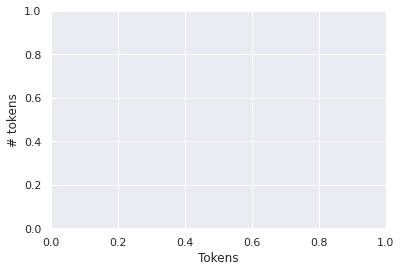

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.ylabel('# tokens')
plt.xlabel('Tokens')
x = np.arange(2)
plt.bar(x, num_palabras)
plt.show()

In [ ]:
freq = nltk.FreqDist(tokens)
for key, val in freq.items():
  print(str(key) + "\t" + str(val))

background	6
circle	1
at	1
color	31
fff	2
solid	3
transparent	9
hover	23
media	5
screen	3
and	6
display	10
none	11
important	29
white	1
li	21
width	5
block	2
auto	2
bottom	1
top	3
inherit	1
la	441
libertad	69
financiera	82
y	286
context	1
https	31
graph	1
type	7
person	1
organization	1
id	11
name	3
image	1
imageobject	2
personlogo	2
inlanguage	4
url	8
caption	1
logo	1
website	3
financiero	12
alcanza	3
independencia	29
description	2
publisher	1
potentialaction	2
searchaction	1
target	2
required	1
primaryimage	2
height	2
webpage	2
ispartof	1
about	1
primaryimageofpage	1
datepublished	1
datemodified	1
alcanzar	43
tener	42
vida	31
que	670
deseas	2
se	86
puede	22
en	470
este	123
blog	18
las	107
readaction	1
var	27
true	5
disablestr	5
function	28
to	5
detect	1
opted	1
out	3
users	1
return	14
disable	1
tracking	1
if	41
the	5
cookie	1
exists	1
window	7
dec	1
utc	1
i	18
s	1
o	59
g	1
r	7
a	350
m	2
arguments	3
date	2
document	4
else	8
noopfn	5
null	5
noopnullfn	2
tracker	2
p	2
len	2
f	3
typeof	3


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


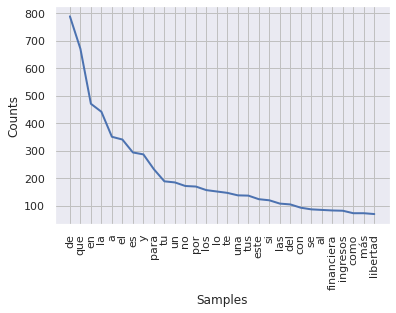

In [ ]:
import seaborn as sns
sns.set()
freq.plot(30, cumulative=False)

In [ ]:
from nltk.corpus import stopwords
clean_tokens = tokens[:]
for token in tokens:
  if token in stopwords.words('spanish'):
    clean_tokens.remove(token)


In [ ]:
num_palabras.append( len(clean_tokens)  )

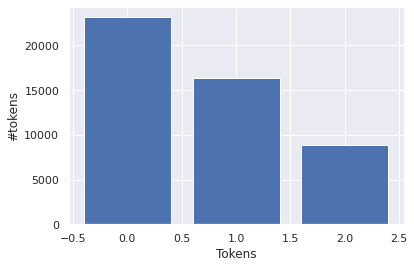

In [ ]:
plt.ylabel('#tokens')
plt.xlabel('Tokens')
x = np.arange(3)
plt.bar(x, num_palabras)
plt.show()

In [ ]:
for t in clean_tokens:
  print(t)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
noviembre
cyber
monday
siguiente
lunes
después
black
friday
fechas
clave
poder
adquirir
productos
tecnológicos
importantes
descuentos
ojo
marketing
fechas
abusivo
muchas
ocasiones
verás
descuentos
realidad
hace
subir
precio
base
rebajar
producto
valía
anteriormente
ser
consciente
buena
idea
verificar
evolución
precio
artículos
amazon
través
herramientas
explicó
post
si
necesita
tener
último
gadget
tecnológico
última
versión
importante
prestes
atención
eventos
mobile
world
congress
finales
febrero
ifa
principios
septiembre
eventos
presentan
multitud
productos
tecnológicos
puedes
aprovechar
fuertes
descuentos
realizan
marcas
artículo
predecesor
decir
si
samsung
apple
presentan
nueva
versión
smartphone
insignia
esperar
justo
versión
previa
smartphone
importante
rebaja
vivienda
según
estudios
trovimap
mejor
estación
compra
vivienda
después
verano
septiembre
competencia
baja
puesto
competir
compradores
quieren
casa
vacacione

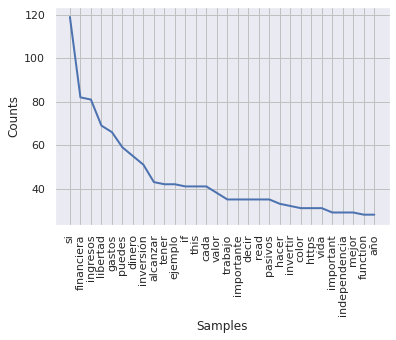

In [ ]:
freq = nltk.FreqDist(clean_tokens)
sns.set()
freq.plot(30, cumulative=False)

In [ ]:
sinonimos = ['independencia']
tokens_ = ['la', 'Libertad', 'independencia', 'Independencia']
equivalencia_principal = 'libertad'

tokens_sinonimos = tokens_[:]
for sin in sinonimos:
  tokens_sinonimos = [w.lower().replace(sin, equivalencia_principal) for w in tokens_sinonimos]
  print(tokens_sinonimos)

['la', 'libertad', 'libertad', 'libertad']


# Caso

In [ ]:
import pandas as pd
from google.colab import files
subido = files.upload()
import io


Saving data.txt to data.txt


In [ ]:
f = open('data.txt', 'r')
print(f.read())

Te ofrecemos
Buenas tardes, te ofrecemos los mejores servicios
Oferta de nuevos celulares
Bienvenido al webinar de la universidad
Notas del curso de Inteligencia Artificial



In [ ]:
f = open('data.txt', 'r')
for x in f:
  print("["+x+']')

[Te ofrecemos
]
[Buenas tardes, te ofrecemos los mejores servicios
]
[Oferta de nuevos celulares
]
[Bienvenido al webinar de la universidad
]
[Notas del curso de Inteligencia Artificial
]


In [ ]:
f = open('data.txt', 'r')
texto = BeautifulSoup(f, 'html5lib')
texto = texto.get_text(strip=True)
print(texto)

Te ofrecemos
Buenas tardes, te ofrecemos los mejores servicios
Oferta de nuevos celulares
Bienvenido al webinar de la universidad
Notas del curso de Inteligencia Artificial


In [ ]:
for x in texto.split('\n'):
  print("["+x+']')

[Te ofrecemos]
[Buenas tardes, te ofrecemos los mejores servicios]
[Oferta de nuevos celulares]
[Bienvenido al webinar de la universidad]
[Notas del curso de Inteligencia Artificial]


In [ ]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(texto, 'spanish')
print(tokens)

['Te', 'ofrecemos', 'Buenas', 'tardes', ',', 'te', 'ofrecemos', 'los', 'mejores', 'servicios', 'Oferta', 'de', 'nuevos', 'celulares', 'Bienvenido', 'al', 'webinar', 'de', 'la', 'universidad', 'Notas', 'del', 'curso', 'de', 'Inteligencia', 'Artificial']


In [ ]:
for t in tokens:
  print(t)

Te
ofrecemos
Buenas
tardes
,
te
ofrecemos
los
mejores
servicios
Oferta
de
nuevos
celulares
Bienvenido
al
webinar
de
la
universidad
Notas
del
curso
de
Inteligencia
Artificial


In [ ]:
frecuencias = nltk.FreqDist(tokens)
for t, f in frecuencias.items():
  print("{}\t{}".format(t, f))

Te	1
ofrecemos	2
Buenas	1
tardes	1
,	1
te	1
los	1
mejores	1
servicios	1
Oferta	1
de	3
nuevos	1
celulares	1
Bienvenido	1
al	1
webinar	1
la	1
universidad	1
Notas	1
del	1
curso	1
Inteligencia	1
Artificial	1


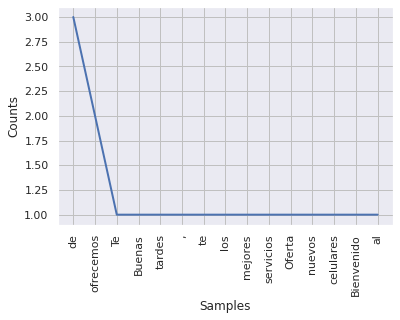

In [ ]:
import seaborn as sns
sns.set()
frecuencias.plot(15, cumulative=False)

In [ ]:
tokens = [w.lower() for w in tokens if w.isalpha()]

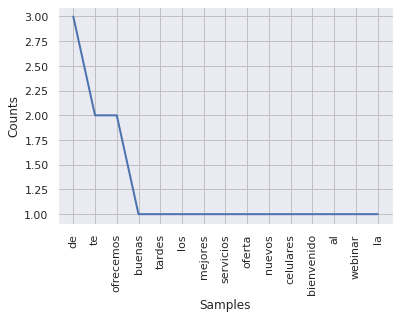

In [ ]:
frecuencias = nltk.FreqDist(tokens)
frecuencias.plot(15, cumulative=False)

In [ ]:
from nltk.corpus import stopwords
tokens2 = tokens[:]
for t in tokens:
  if t in stopwords.words('spanish'):
    tokens2.remove(t)

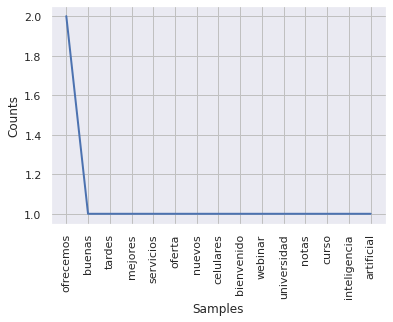

In [ ]:
frecuencias = nltk.FreqDist(tokens2)
frecuencias.plot(15, cumulative=False)

In [ ]:
stopwords2 = ['buenas', 'tardes', 'mejores', 'nuevos', 'celulares', 'bienvenido']
tokens3 = tokens2[:]
for t in tokens2:
  if t in stopwords2:
    tokens3.remove(t)

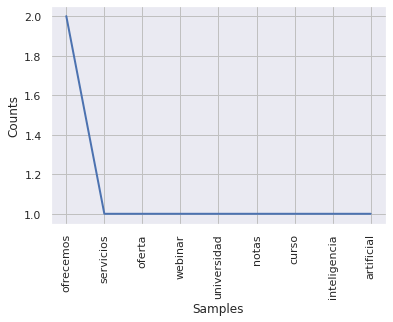

In [ ]:
frecuencias = nltk.FreqDist(tokens3)
frecuencias.plot(15, cumulative=False)

# Sinónimo o equivalencias

In [ ]:
#Hacemos equivalencia de 'inteligencia' y 'artificial' como: "IA"
equivalencias = ['inteligencia', 'artificial']
equivalencia_principal = 'ia'
tokens4 = tokens3[:]
for e in equivalencias:
  tokens4 = [w.lower().replace(e, equivalencia_principal) for w in tokens4]
print(tokens3)  
print(tokens4)  

['ofrecemos', 'ofrecemos', 'servicios', 'oferta', 'webinar', 'universidad', 'notas', 'curso', 'inteligencia', 'artificial']
['ofrecemos', 'ofrecemos', 'servicios', 'oferta', 'webinar', 'universidad', 'notas', 'curso', 'ia', 'ia']


In [ ]:
equivalencias = ['curso', 'notas']
equivalencia_principal = 'curso'
tokens5 = tokens4[:]
for e in equivalencias:
  tokens5 = [w.lower().replace(e, equivalencia_principal) for w in tokens5]
print(tokens4)  
print(tokens5)  

['ofrecemos', 'ofrecemos', 'servicios', 'oferta', 'webinar', 'universidad', 'notas', 'curso', 'ia', 'ia']
['ofrecemos', 'ofrecemos', 'servicios', 'oferta', 'webinar', 'universidad', 'curso', 'curso', 'ia', 'ia']


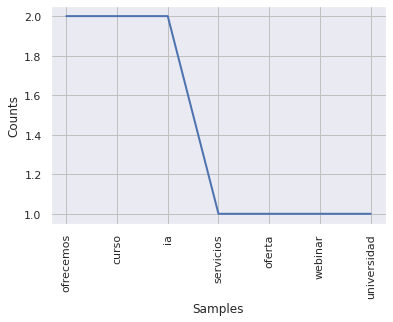

In [ ]:
frecuencias = nltk.FreqDist(tokens5)
frecuencias.plot(15, cumulative=False)

In [ ]:
equivalencias = ['curso', 'universidad']
equivalencia_principal = 'universidad'
tokens6 = tokens5[:]
for e in equivalencias:
  tokens6 = [w.lower().replace(e, equivalencia_principal) for w in tokens6]
print(tokens5)  
print(tokens6)  

['ofrecemos', 'ofrecemos', 'servicios', 'oferta', 'webinar', 'universidad', 'curso', 'curso', 'ia', 'ia']
['ofrecemos', 'ofrecemos', 'servicios', 'oferta', 'webinar', 'universidad', 'universidad', 'universidad', 'ia', 'ia']


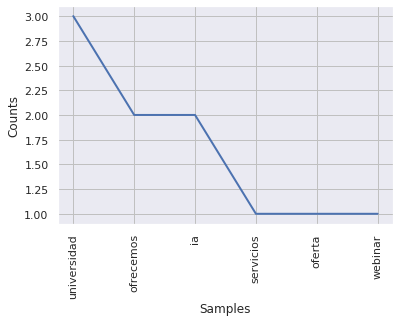

In [ ]:
frecuencias = nltk.FreqDist(tokens6)
frecuencias.plot(15, cumulative=False)

## Derivación Regresiva
cantando $\to$ cant

cantante $\to$ cant

In [ ]:
from nltk.stem import SnowballStemmer
esp_stemmer = SnowballStemmer('spanish')
tokens7 = [esp_stemmer.stem(t) for t in tokens6]
print(tokens6)
print(tokens7)

['ofrecemos', 'ofrecemos', 'servicios', 'oferta', 'webinar', 'universidad', 'universidad', 'universidad', 'ia', 'ia']
['ofrec', 'ofrec', 'servici', 'ofert', 'webin', 'univers', 'univers', 'univers', 'ia', 'ia']


# Lematización

Dije $\to$ Decir

Mesas $\to$ Mesa

In [ ]:
!pip install spicy

In [ ]:
import spacy
spacy.cli.download('es_core_news_md')
nlp = spacy.load('es_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [ ]:
for t in nlp('oferta ofertas ofertar ofrecimiento'):
  print(t.text, t.lemma_, t.pos_)

oferta ofertar NOUN
ofertas ofertar NOUN
ofertar ofertar VERB
ofrecimiento ofrecimiento NOUN


In [ ]:
tokens8 = []
separador = ' '
for t in nlp(separador.join(tokens6)):
  print(t.text, t.lemma_, t.pos_)
  tokens8.append(t.lemma_)

print(tokens6)  
print(tokens8)  

ofrecemos ofrecer VERB
ofrecemos ofrecer VERB
servicios servicio NOUN
oferta ofertar ADJ
webinar webinar ADJ
universidad universidad PROPN
universidad universidad PROPN
universidad universidad PROPN
ia ia PROPN
ia ia PROPN
['ofrecemos', 'ofrecemos', 'servicios', 'oferta', 'webinar', 'universidad', 'universidad', 'universidad', 'ia', 'ia']
['ofrecer', 'ofrecer', 'servicio', 'ofertar', 'webinar', 'universidad', 'universidad', 'universidad', 'ia', 'ia']


In [ ]:
equivalencias = ['ofrecer', 'ofertar']
equivalencia_principal = 'ofrecer'
tokens9 = tokens8[:]
for e in equivalencias:
  tokens9 = [w.lower().replace(e, equivalencia_principal) for w in tokens9]
print(tokens8)  
print(tokens9)  

['ofrecer', 'ofrecer', 'servicio', 'ofertar', 'webinar', 'universidad', 'universidad', 'universidad', 'ia', 'ia']
['ofrecer', 'ofrecer', 'servicio', 'ofrecer', 'webinar', 'universidad', 'universidad', 'universidad', 'ia', 'ia']


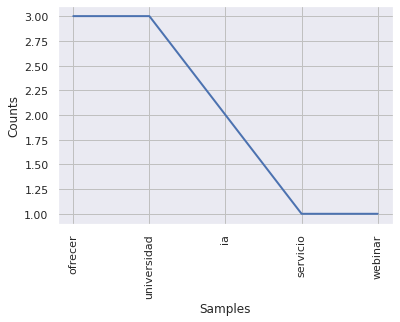

In [ ]:
frecuencias = nltk.FreqDist(tokens9)
frecuencias.plot(15, cumulative=False)

# Bag of Words

In [ ]:
for t in tokens9:
  print(t)

ofrecer
ofrecer
servicio
ofrecer
webinar
universidad
universidad
universidad
ia
ia


In [ ]:
def palabras_unicas(lista):
  cadenas = []
  for p in lista:
    if not p in cadenas:
      cadenas.append(p)
  return cadenas    

In [ ]:
proto = palabras_unicas(tokens9)
for p in proto:
  print(p)

ofrecer
servicio
webinar
universidad
ia


In [ ]:
bag_of_words = [
        [1,0,0,0,0,1],
        [1,1,0,0,0,1],
        [1,0,0,0,0,1],
        [0,0,1,1,0,0],
        [0,0,0,1,1,0]
]

In [ ]:
df = pd.DataFrame(bag_of_words)

In [ ]:
df.head()

,0,1,2,3,4,5
0,1,0,0,0,0,1
1,1,1,0,0,0,1
2,1,0,0,0,0,1
3,0,0,1,1,0,0
4,0,0,0,1,1,0


# PLN

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> alpino
      Unzipping corpora/alpino.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> wordnet
      Unzipping corpora/wordnet.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords

True

In [ ]:
import io
import pandas as pd
from google.colab import files
subido = files.upload()

Saving data.txt to data.txt


In [ ]:
from bs4 import BeautifulSoup
import urllib.request

f=open('data.txt', 'r')
texto = BeautifulSoup(f, 'html5lib')
texto = texto.get_text(strip=True)
print(texto)

Te ofrecemos mejores servicios----->SPAM
Buenas tardes, te ofrecemos los mejores servicios----->SPAM
Oferta de nuevos celulares----->SPAM
Bienvenido al webinar de la universidad----->NOSPAM
Notas del curso de Inteligencia Artificial----->NOSPAM
Encuesta del curso de Machine Learning----->NOSPAM
Oferta de viajes a Europa----->SPAM
Matrícula para el semestre 2020-2----->NOSPAM
Compra el nuevo servicio de telefonía celular----->SPAM
Trabajo final del curso de Machine Learning----->NOSPAM


In [ ]:
!pip install spicy

In [ ]:
import spacy
spacy.cli.download('es_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [ ]:
nlp = spacy.load('es_core_news_md')

In [ ]:
def extraer_texto(texto):
  X_cadenas = []
  Y_cadena = []
  textoSalida = ''
  for x in texto.split('\n'):
    cadena, clase = x.split('----->')
    X_cadenas.append(cadena)
    Y_cadena.append(clase)
    textoSalida += cadena + ' '
  return textoSalida, X_cadenas, Y_cadena

In [ ]:
textoSalida, X_cadenas, Y_cadena = extraer_texto(texto)
print('Reportar Texto Salida')
print(textoSalida)

print('Reportar Xcadenas')
print(X_cadenas)

print('Reportar Ycadena')
print(Y_cadena)

Reportar Texto Salida
Te ofrecemos mejores servicios Buenas tardes, te ofrecemos los mejores servicios Oferta de nuevos celulares Bienvenido al webinar de la universidad Notas del curso de Inteligencia Artificial Encuesta del curso de Machine Learning Oferta de viajes a Europa Matrícula para el semestre 2020-2 Compra el nuevo servicio de telefonía celular Trabajo final del curso de Machine Learning 
Reportar Xcadenas
['Te ofrecemos mejores servicios', 'Buenas tardes, te ofrecemos los mejores servicios', 'Oferta de nuevos celulares', 'Bienvenido al webinar de la universidad', 'Notas del curso de Inteligencia Artificial', 'Encuesta del curso de Machine Learning', 'Oferta de viajes a Europa', 'Matrícula para el semestre 2020-2', 'Compra el nuevo servicio de telefonía celular', 'Trabajo final del curso de Machine Learning']
Reportar Ycadena
['SPAM', 'SPAM', 'SPAM', 'NOSPAM', 'NOSPAM', 'NOSPAM', 'SPAM', 'NOSPAM', 'SPAM', 'NOSPAM']


In [ ]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

#ofrecemos, oferta, compra el nuevo servicio ---> ofertar
patron1 = [{'LOWER':'ofrecemos'}]
patron2 = [{'LOWER':'oferta'}]
patron3 = [{'LOWER':'compra'}, {'LOWER':'el'}, {'LOWER':'nuevo'}, {'LOWER':'servicio'}]
matcher.add('ofertar', None, patron1, patron2, patron3)

#universidad, IA, ML, semestre 2020-2 ----> universidad
matcher2 = Matcher(nlp.vocab)
patron1 = [{'LOWER':'universidad'}]
patron2 = [{'LOWER':'inteligencia'}, {'LOWER':'artificial'}]
patron3 = [{'LOWER':'machine'}, {'LOWER':'learning'}]
patron4 = [{'LOWER':'semestre'}, {'LOWER':'2020'}, {'LOWER':'-'}, {'LOWER':'2'}]
matcher2.add('universidad', None, patron1, patron2, patron3, patron4)


In [ ]:
def detectar_asociaciones(matcher, doc):
  asociaciones = matcher(doc)
  for m_id, inicio, fin in asociaciones:
    s_id = nlp.vocab.strings[m_id]
    span = doc[inicio:fin]
    print(s_id, span.text)
  return asociaciones  

In [ ]:
doc = nlp(textoSalida)
asociaciones_ofertar = detectar_asociaciones(matcher, doc)
print(textoSalida)

ofertar ofrecemos
ofertar ofrecemos
ofertar Oferta
ofertar Oferta
ofertar Compra el nuevo servicio
Te ofrecemos mejores servicios Buenas tardes, te ofrecemos los mejores servicios Oferta de nuevos celulares Bienvenido al webinar de la universidad Notas del curso de Inteligencia Artificial Encuesta del curso de Machine Learning Oferta de viajes a Europa Matrícula para el semestre 2020-2 Compra el nuevo servicio de telefonía celular Trabajo final del curso de Machine Learning 


In [ ]:
asociaciones_universidad = detectar_asociaciones(matcher2, doc)
print(textoSalida)

universidad universidad
universidad Inteligencia Artificial
universidad Machine Learning
universidad semestre 2020-2
universidad Machine Learning
Te ofrecemos mejores servicios Buenas tardes, te ofrecemos los mejores servicios Oferta de nuevos celulares Bienvenido al webinar de la universidad Notas del curso de Inteligencia Artificial Encuesta del curso de Machine Learning Oferta de viajes a Europa Matrícula para el semestre 2020-2 Compra el nuevo servicio de telefonía celular Trabajo final del curso de Machine Learning 


In [ ]:
def sustituir_por_agrupadores(texto, asociaciones):
  texto2 = texto
  for m_id, inicio, fin in asociaciones:
    s_id = nlp.vocab.strings[m_id]
    span = doc[inicio:fin]
    texto2 = texto2.replace(span.text, s_id)
  return texto2  

In [ ]:
texto2 = sustituir_por_agrupadores(textoSalida, asociaciones_universidad)
print(textoSalida)
print(texto2)

Te ofrecemos mejores servicios Buenas tardes, te ofrecemos los mejores servicios Oferta de nuevos celulares Bienvenido al webinar de la universidad Notas del curso de Inteligencia Artificial Encuesta del curso de Machine Learning Oferta de viajes a Europa Matrícula para el semestre 2020-2 Compra el nuevo servicio de telefonía celular Trabajo final del curso de Machine Learning 
Te ofrecemos mejores servicios Buenas tardes, te ofrecemos los mejores servicios Oferta de nuevos celulares Bienvenido al webinar de la universidad Notas del curso de universidad Encuesta del curso de universidad Oferta de viajes a Europa Matrícula para el universidad Compra el nuevo servicio de telefonía celular Trabajo final del curso de universidad 


In [ ]:
texto3 = sustituir_por_agrupadores(texto2, asociaciones_ofertar)
print(texto2)
print(texto3)

Te ofrecemos mejores servicios Buenas tardes, te ofrecemos los mejores servicios Oferta de nuevos celulares Bienvenido al webinar de la universidad Notas del curso de universidad Encuesta del curso de universidad Oferta de viajes a Europa Matrícula para el universidad Compra el nuevo servicio de telefonía celular Trabajo final del curso de universidad 
Te ofertar mejores servicios Buenas tardes, te ofertar los mejores servicios ofertar de nuevos celulares Bienvenido al webinar de la universidad Notas del curso de universidad Encuesta del curso de universidad ofertar de viajes a Europa Matrícula para el universidad ofertar de telefonía celular Trabajo final del curso de universidad 


In [ ]:
from spacy import displacy
doc = nlp(textoSalida)
displacy.render(doc, style='ent', jupyter=True)

# Lematización

In [ ]:
doc2 = nlp(texto3)
tokens = []
for token in doc2:
  print(token.text + ' ---> ' + token.lemma_)
  tokens.append(token.lemma_)

Te ---> Te
ofertar ---> ofertar
mejores ---> mejorar
servicios ---> servicio
Buenas ---> Buenas
tardes ---> tarde
, ---> ,
te ---> te
ofertar ---> ofertar
los ---> lo
mejores ---> mejorar
servicios ---> servicio
ofertar ---> ofertar
de ---> de
nuevos ---> nuevo
celulares ---> celular
Bienvenido ---> Bienvenido
al ---> al
webinar ---> webinar
de ---> de
la ---> lo
universidad ---> universidad
Notas ---> Notas
del ---> del
curso ---> cursar
de ---> de
universidad ---> universidad
Encuesta ---> Encuesta
del ---> del
curso ---> cursar
de ---> de
universidad ---> universidad
ofertar ---> ofertar
de ---> de
viajes ---> viaje
a ---> a
Europa ---> Europa
Matrícula ---> Matrícula
para ---> parir
el ---> el
universidad ---> universidad
ofertar ---> ofertar
de ---> de
telefonía ---> telefonía
celular ---> celular
Trabajo ---> Trabajo
final ---> final
del ---> del
curso ---> cursar
de ---> de
universidad ---> universidad


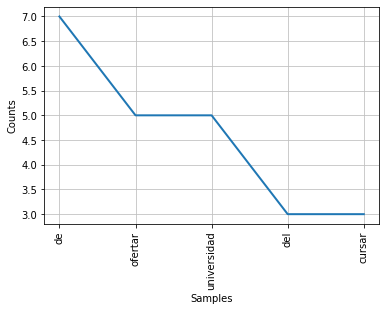

In [ ]:
freq = nltk.FreqDist(tokens)
freq.plot(5, cumulative=False)

In [ ]:
for x in freq.most_common(50):
  print(x)

('de', 7)
('ofertar', 5)
('universidad', 5)
('del', 3)
('cursar', 3)
('mejorar', 2)
('servicio', 2)
('lo', 2)
('celular', 2)
('Te', 1)
('Buenas', 1)
('tarde', 1)
(',', 1)
('te', 1)
('nuevo', 1)
('Bienvenido', 1)
('al', 1)
('webinar', 1)
('Notas', 1)
('Encuesta', 1)
('viaje', 1)
('a', 1)
('Europa', 1)
('Matrícula', 1)
('parir', 1)
('el', 1)
('telefonía', 1)
('Trabajo', 1)
('final', 1)


In [ ]:
X_cadenas

['Te ofrecemos mejores servicios',
 'Buenas tardes, te ofrecemos los mejores servicios',
 'Oferta de nuevos celulares',
 'Bienvenido al webinar de la universidad',
 'Notas del curso de Inteligencia Artificial',
 'Encuesta del curso de Machine Learning',
 'Oferta de viajes a Europa',
 'Matrícula para el semestre 2020-2',
 'Compra el nuevo servicio de telefonía celular',
 'Trabajo final del curso de Machine Learning']

In [ ]:
X_cadenas2 = []
for x in X_cadenas:
  c = sustituir_por_agrupadores(x, asociaciones_ofertar)
  c2 = sustituir_por_agrupadores(c, asociaciones_universidad)
  X_cadenas2.append(c2)

In [ ]:
X_cadenas

['Te ofrecemos mejores servicios',
 'Buenas tardes, te ofrecemos los mejores servicios',
 'Oferta de nuevos celulares',
 'Bienvenido al webinar de la universidad',
 'Notas del curso de Inteligencia Artificial',
 'Encuesta del curso de Machine Learning',
 'Oferta de viajes a Europa',
 'Matrícula para el semestre 2020-2',
 'Compra el nuevo servicio de telefonía celular',
 'Trabajo final del curso de Machine Learning']

In [ ]:
X_cadenas2

['Te ofertar mejores servicios',
 'Buenas tardes, te ofertar los mejores servicios',
 'ofertar de nuevos celulares',
 'Bienvenido al webinar de la universidad',
 'Notas del curso de universidad',
 'Encuesta del curso de universidad',
 'ofertar de viajes a Europa',
 'Matrícula para el universidad',
 'ofertar de telefonía celular',
 'Trabajo final del curso de universidad']

In [ ]:
tokens = ['ofertar', 'universidad']

In [ ]:
def bag_of_words(cadena, tokens):
  X = [0]*len(tokens)
  i = 0
  for t in tokens:
    if cadena.find(t) != -1:
      X[i] = 1
    i+=1  
  return X

In [ ]:
X = bag_of_words(X_cadenas2[0], tokens)
print(X)

[1, 0]


In [ ]:
X_cadenas2[0]

'Te ofertar mejores servicios'

In [ ]:
Y_cadena

['SPAM',
 'SPAM',
 'SPAM',
 'NOSPAM',
 'NOSPAM',
 'NOSPAM',
 'SPAM',
 'NOSPAM',
 'SPAM',
 'NOSPAM']

In [ ]:
cp = 'SPAM'
Y = []
for c in Y_cadena:
  if c == cp:
    Y.append(1)
  else:
    Y.append(0)  

print(Y)    

[1, 1, 1, 0, 0, 0, 1, 0, 1, 0]


In [ ]:
#Al fusionar X e Y
matriz = [
          [1,0,1],
          [1,0,1],
          [1,0,1],
          [0,1,0],
          [0,1,0],
          [0,1,0],
          [1,0,1],
          [0,1,0],
          [1,0,1],
          [0,1,0]
]

In [ ]:
import pandas as pd
df = pd.DataFrame(
    matriz
)

In [ ]:
df.head()

,0,1,2
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,0
4,0,1,0


In [ ]:
X = df.iloc[:,0:2]
Y = df.iloc[:,2]

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(2,2), max_iter=1000, learning_rate_init=0.3, activation='logistic')

In [ ]:
mlp.fit(X_train, Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 2), learning_rate='constant',
              learning_rate_init=0.3, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
mlp.predict(X_test)

array([0, 1])

In [ ]:
resultados = (mlp.predict(X_test)==Y_test)
accuracy = sum(resultados)/len(resultados)
print("Accuracy: ", accuracy)

Accuracy:  1.0


In [ ]:
import numpy as np
#10 fold cross validation
k=10
kfold = KFold(n_splits=k)
cv_resultado = cross_val_score(mlp, X, Y, cv=kfold, scoring='f1_macro')
promedio = np.mean(cv_resultado)
print("Promedio de F1: ", promedio)
print(cv_resultado)

Promedio de F1:  1.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
